In [1]:
import torch
import numpy as np
from torch import nn,optim
from torchvision import datasets,transforms

In [2]:
from utils import Logger

In [3]:
def data():
    preprocess=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
    return (datasets.MNIST(root='./dataset',train=True,transform=preprocess,download=True))
    

In [4]:
mnist_data=data()

In [5]:
dataloader=torch.utils.data.DataLoader(mnist_data,batch_size=100,shuffle=True)
num_batches=len(dataloader)

In [6]:
#Discriminator Net
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        n_features=784 #28*28 is the input size for each image
        n_out=1 #we need a binary decision here: real or fake
        self.lin0=nn.Linear(n_features,1024)
        self.lin1=nn.Linear(1024,512)
        self.lin2=nn.Linear(512,256)
        self.out=nn.Linear(256,n_out)
        self.dropout=nn.Dropout(p=0.3)
        self.leaky=nn.LeakyReLU(0.2)
        self.sigmoid=nn.Sigmoid()
        
    def forward(self,x):
        x=self.dropout(self.leaky(self.lin0(x)))
        x=self.dropout(self.leaky(self.lin1(x)))
        x=self.dropout(self.leaky(self.lin2(x)))
        x=self.sigmoid(self.out(x))
        return x

In [7]:
#object creation
disc=Discriminator()

In [8]:
#additional functionality
def image_to_vec(image):
    return image.view(image.size(0),784)

def vec_to_image(vector):
    return vector.view(vector.size(0),1,28,28)


In [ ]:
#Generator net
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        n_features=100
        n_out=784
        self.lin0=nn.Linear(n_features,256)
        self.lin1=nn.Linear(256,512)
        self.lin2=nn.Linear(512,1024)
        self.out=nn.Linear(1024,n_out)
        self.leaky=nn.LeakyReLU(0.2)
        self.tanh=nn.Tanh()

    def forward(self,x):
        x=self.leaky(self.lin0(x))
        x=self.leaky(self.lin1(x))
        x=self.leaky(self.lin2(x))
        x=self.tanh(self.out(x))
        return x
        
        
        

In [ ]:
gen=Generator()

In [ ]:
#functionality for random noise
def noise(size):
    n=torch.randn(size,100)#100 for the batch size
    return n

In [ ]:
#optimizers
disc_optimizer=optim.Adam(disc.parameters(),lr=0.0002)
gen_optimizer=optim.Adam(gen.parameters(),lr=0.0002)

In [ ]:
loss=nn.BCELoss()#resembles the loss we need

In [ ]:
#more functionality for image targets
def ones_target(size):
    data=torch.ones(size,1)
    return data

def zeros_target(size):
    data=torch.zeros(size,1)
    return data
    

In [ ]:
def train_disc(opt,real_data,fake_data):
    N=real_data.size(0)
    opt.zero_grad()#reset gradients
    
    pred_real=disc(real_data)
    error_real=loss(pred_real,ones_target(N))
    error_real.backward()
    
    pred_fake=disc(fake_data)
    error_fake=loss(pred_fake,zeros_target(N))
    error_fake.backward()
    
    opt.step()
    
    return error_real+error_fake,pred_real,pred_fake

    

In [ ]:
def train_gen(opt,fake_data):
    N=fake_data.size(0)
    opt.zero_grad()
    
    pred=disc(fake_data)
    error=loss(pred,ones_target(N))
    error.backward()
    opt.step()
    return error


In [ ]:
num_test_samples=16
test_noise=noise(num_test_samples)

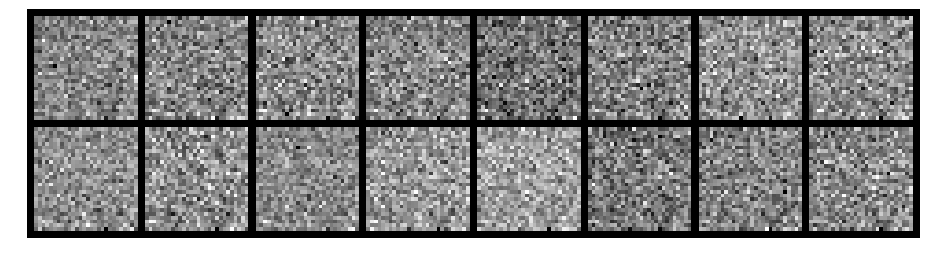

Epoch: [0/200], Batch Num: [0/600]
Discriminator Loss: 1.3700, Generator Loss: 0.6559
D(x): 0.5285, D(G(z)): 0.5190


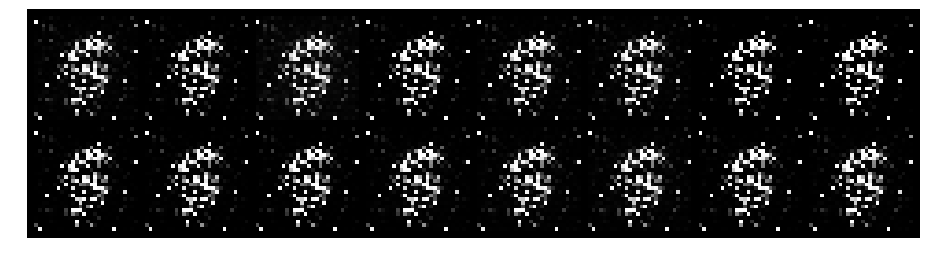

Epoch: [0/200], Batch Num: [300/600]
Discriminator Loss: 0.2388, Generator Loss: 4.6869
D(x): 0.9440, D(G(z)): 0.1429


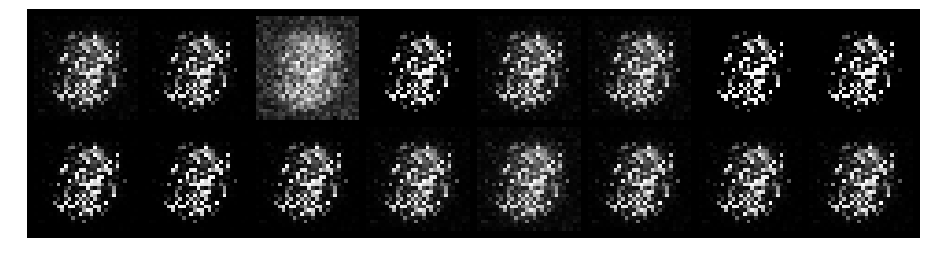

Epoch: [1/200], Batch Num: [0/600]
Discriminator Loss: 0.6138, Generator Loss: 3.8734
D(x): 0.8452, D(G(z)): 0.2072


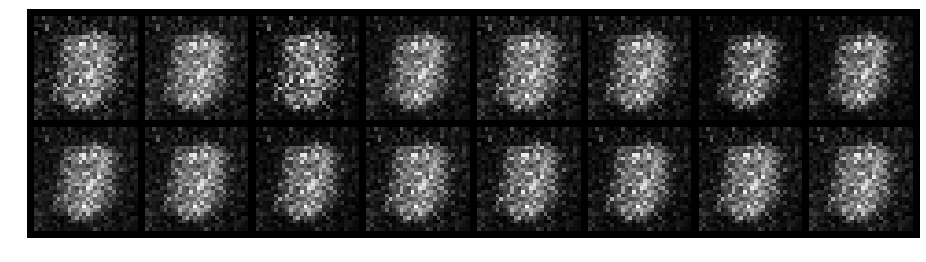

Epoch: [1/200], Batch Num: [300/600]
Discriminator Loss: 1.0210, Generator Loss: 1.3693
D(x): 0.7001, D(G(z)): 0.3999


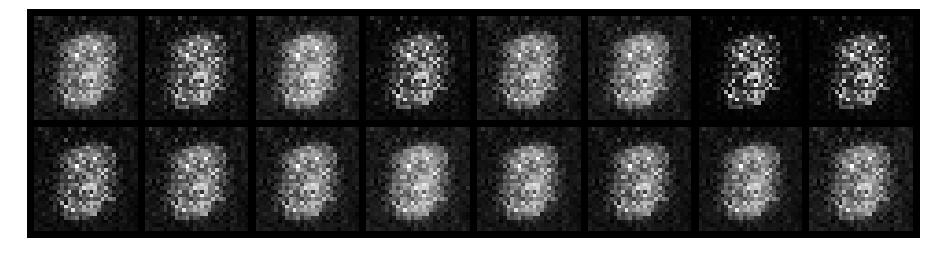

Epoch: [2/200], Batch Num: [0/600]
Discriminator Loss: 0.9749, Generator Loss: 1.7614
D(x): 0.7669, D(G(z)): 0.4044


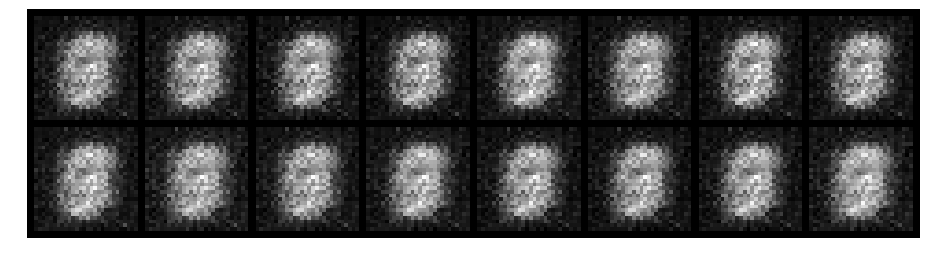

Epoch: [2/200], Batch Num: [300/600]
Discriminator Loss: 0.1928, Generator Loss: 3.6196
D(x): 0.9452, D(G(z)): 0.1003


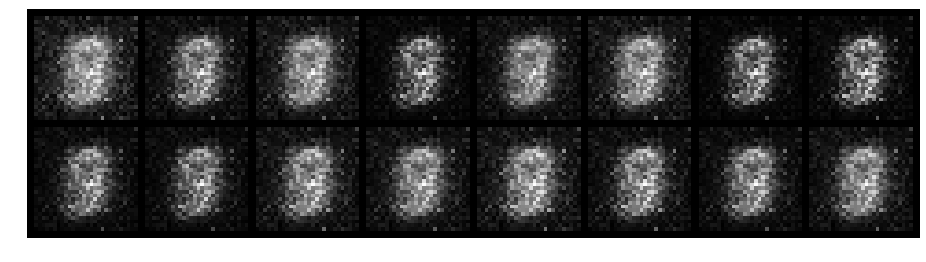

Epoch: [3/200], Batch Num: [0/600]
Discriminator Loss: 0.5986, Generator Loss: 1.7816
D(x): 0.8639, D(G(z)): 0.2504


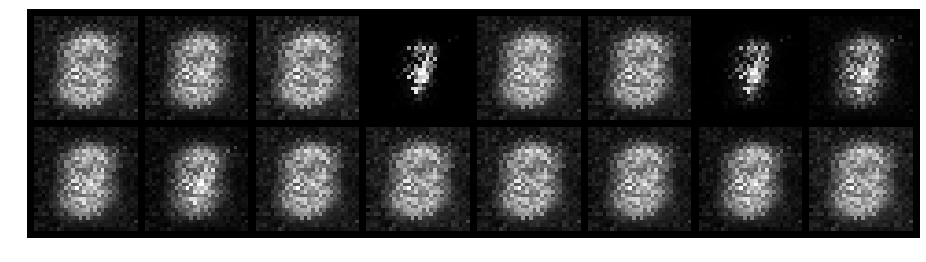

Epoch: [3/200], Batch Num: [300/600]
Discriminator Loss: 0.2622, Generator Loss: 4.0861
D(x): 0.9075, D(G(z)): 0.0656


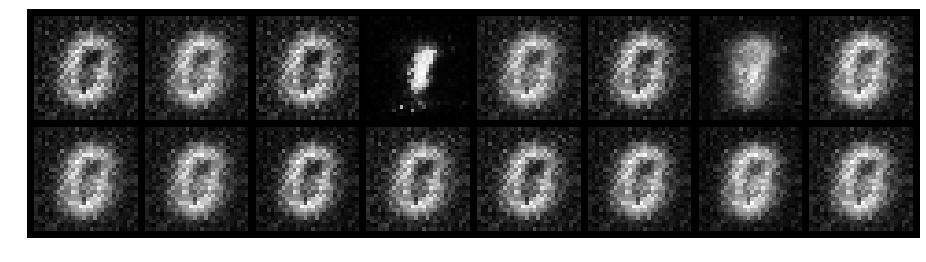

Epoch: [4/200], Batch Num: [0/600]
Discriminator Loss: 0.3992, Generator Loss: 3.3459
D(x): 0.9178, D(G(z)): 0.1219


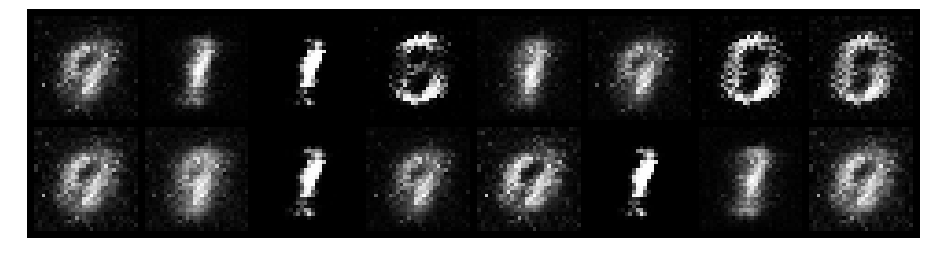

Epoch: [4/200], Batch Num: [300/600]
Discriminator Loss: 0.4955, Generator Loss: 2.6284
D(x): 0.8806, D(G(z)): 0.1672


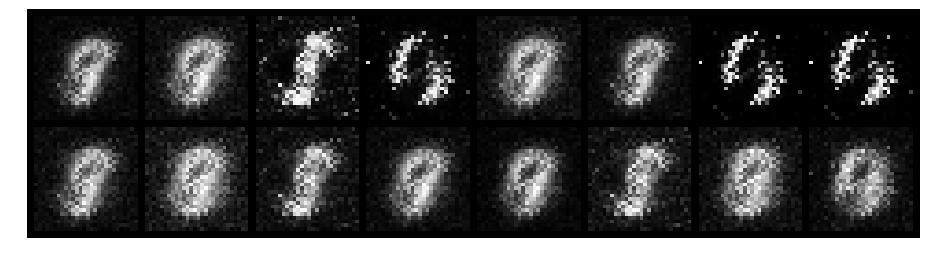

Epoch: [5/200], Batch Num: [0/600]
Discriminator Loss: 0.1566, Generator Loss: 5.1808
D(x): 0.9348, D(G(z)): 0.0314


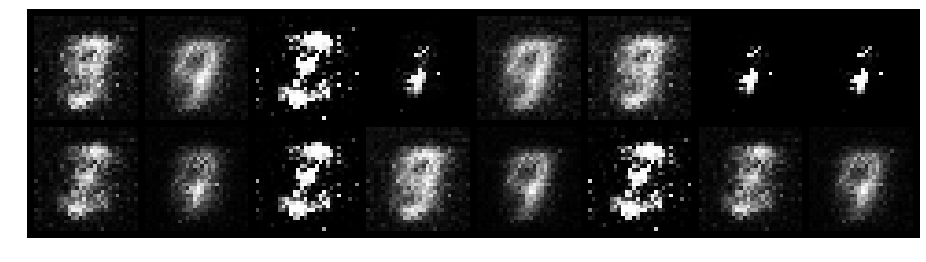

Epoch: [5/200], Batch Num: [300/600]
Discriminator Loss: 0.3534, Generator Loss: 3.1104
D(x): 0.9136, D(G(z)): 0.1574


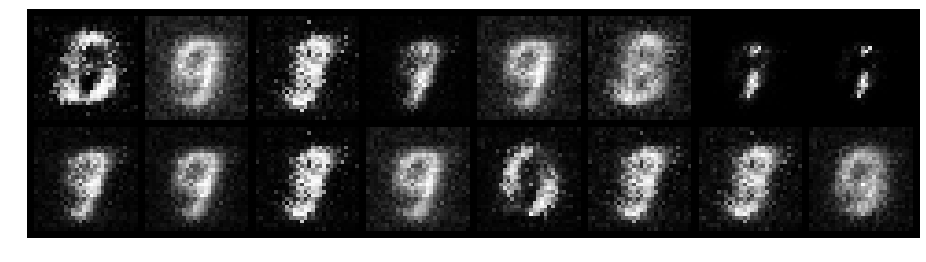

Epoch: [6/200], Batch Num: [0/600]
Discriminator Loss: 0.4642, Generator Loss: 2.8331
D(x): 0.9084, D(G(z)): 0.1849


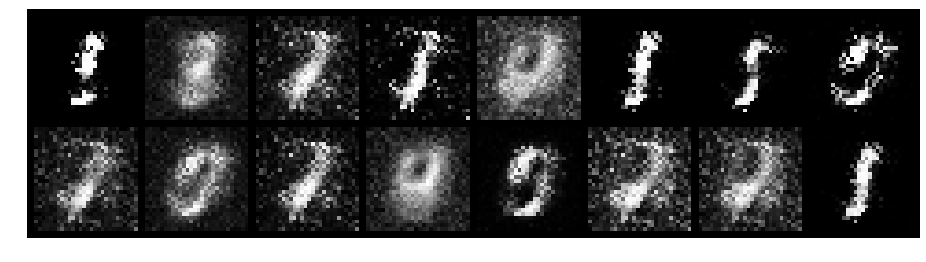

Epoch: [6/200], Batch Num: [300/600]
Discriminator Loss: 0.4769, Generator Loss: 3.5699
D(x): 0.9124, D(G(z)): 0.1756


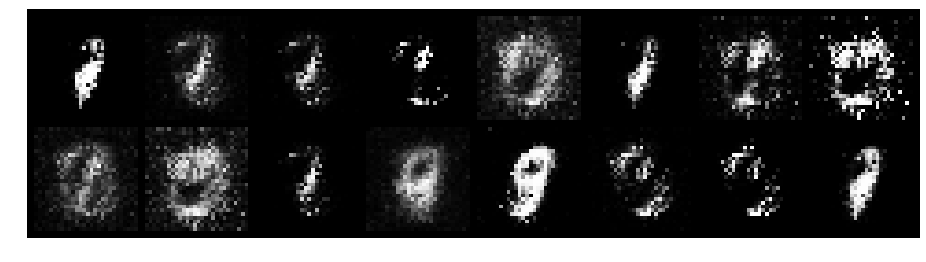

Epoch: [7/200], Batch Num: [0/600]
Discriminator Loss: 0.4311, Generator Loss: 3.1471
D(x): 0.8602, D(G(z)): 0.1286


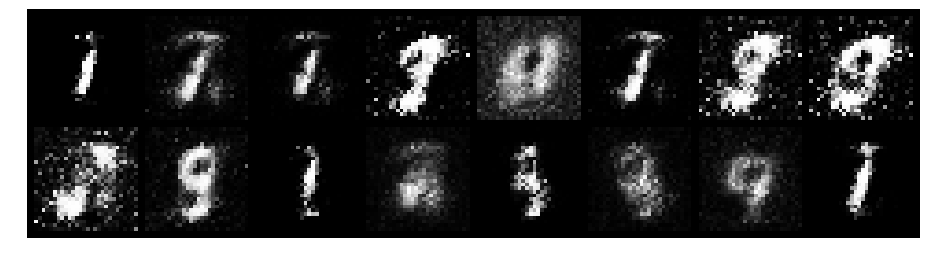

Epoch: [7/200], Batch Num: [300/600]
Discriminator Loss: 0.5814, Generator Loss: 1.6557
D(x): 0.8771, D(G(z)): 0.2102


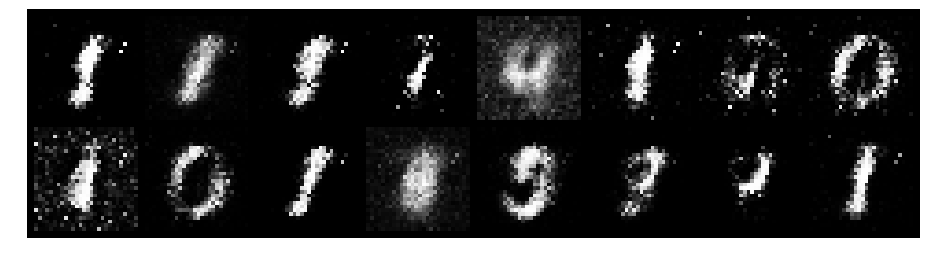

Epoch: [8/200], Batch Num: [0/600]
Discriminator Loss: 0.8762, Generator Loss: 1.3196
D(x): 0.7641, D(G(z)): 0.3573


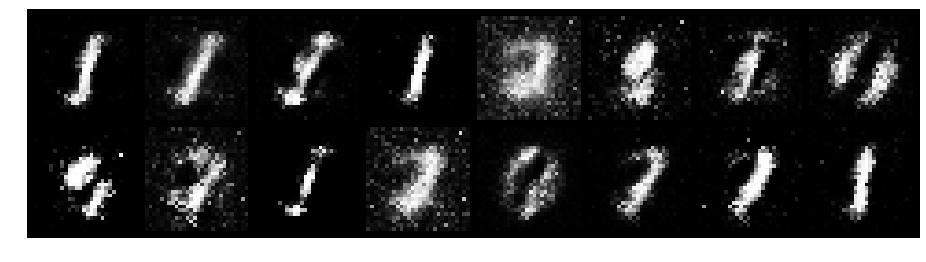

Epoch: [8/200], Batch Num: [300/600]
Discriminator Loss: 0.9408, Generator Loss: 1.3322
D(x): 0.6856, D(G(z)): 0.2994


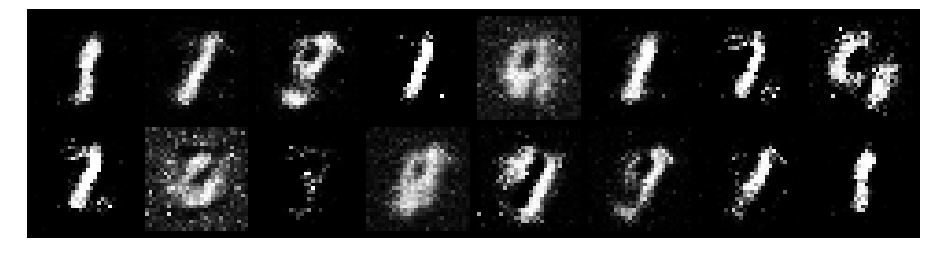

Epoch: [9/200], Batch Num: [0/600]
Discriminator Loss: 0.7026, Generator Loss: 2.7890
D(x): 0.7591, D(G(z)): 0.1288


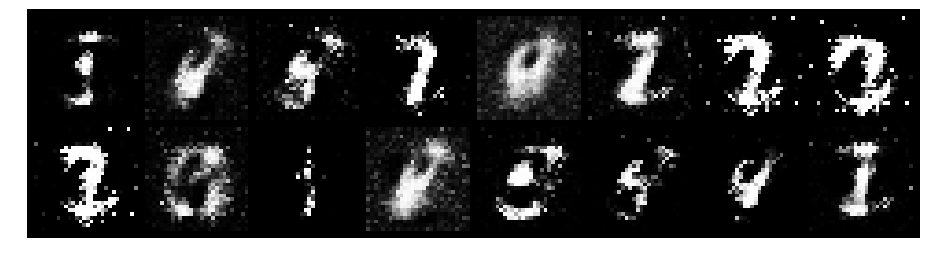

Epoch: [9/200], Batch Num: [300/600]
Discriminator Loss: 0.4791, Generator Loss: 2.7527
D(x): 0.8634, D(G(z)): 0.1826


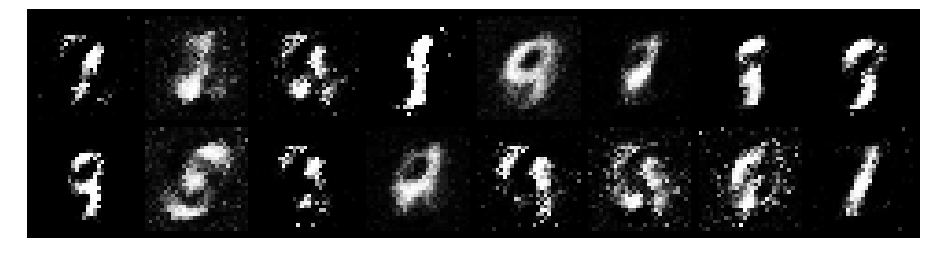

Epoch: [10/200], Batch Num: [0/600]
Discriminator Loss: 0.7022, Generator Loss: 2.8559
D(x): 0.7938, D(G(z)): 0.2284


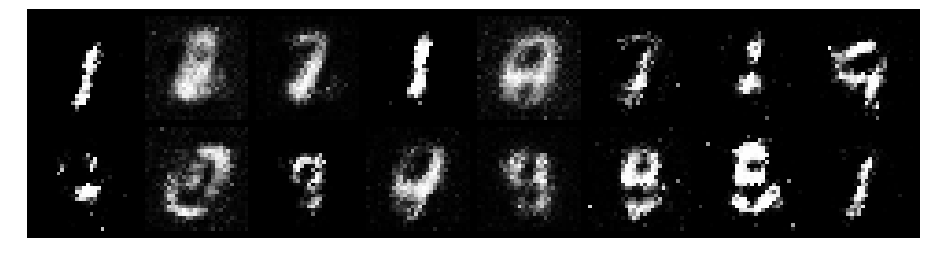

Epoch: [10/200], Batch Num: [300/600]
Discriminator Loss: 0.7631, Generator Loss: 2.4205
D(x): 0.8001, D(G(z)): 0.2314


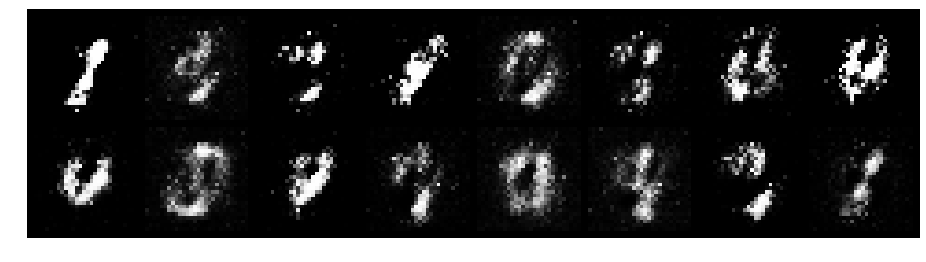

Epoch: [11/200], Batch Num: [0/600]
Discriminator Loss: 0.6325, Generator Loss: 2.2250
D(x): 0.7907, D(G(z)): 0.2088


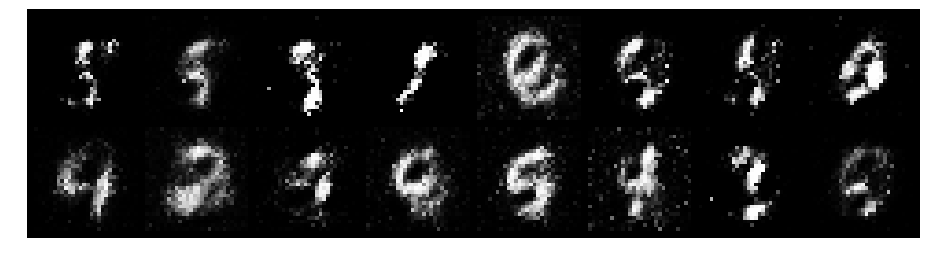

Epoch: [11/200], Batch Num: [300/600]
Discriminator Loss: 0.8363, Generator Loss: 1.9900
D(x): 0.7865, D(G(z)): 0.3187


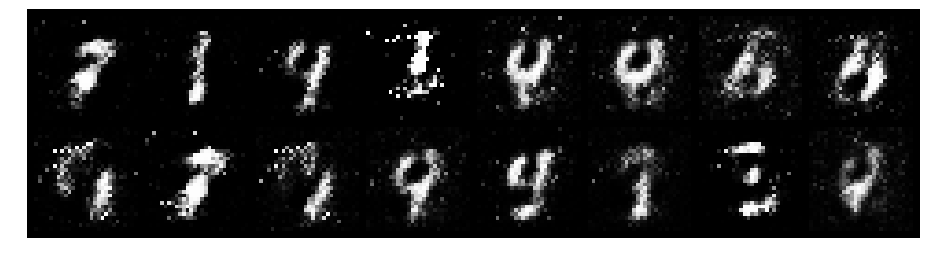

Epoch: [12/200], Batch Num: [0/600]
Discriminator Loss: 0.5531, Generator Loss: 2.6516
D(x): 0.7976, D(G(z)): 0.1691


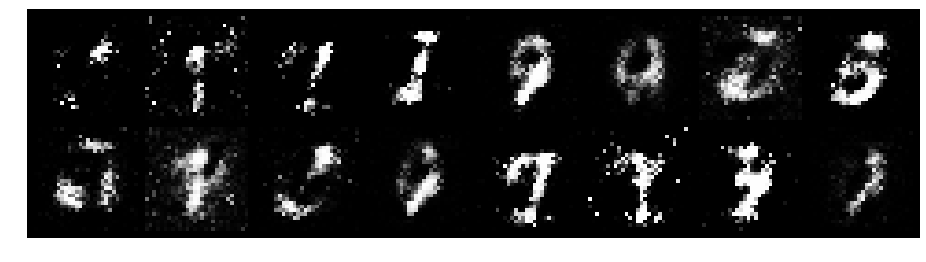

Epoch: [12/200], Batch Num: [300/600]
Discriminator Loss: 0.7326, Generator Loss: 2.3990
D(x): 0.7855, D(G(z)): 0.2533


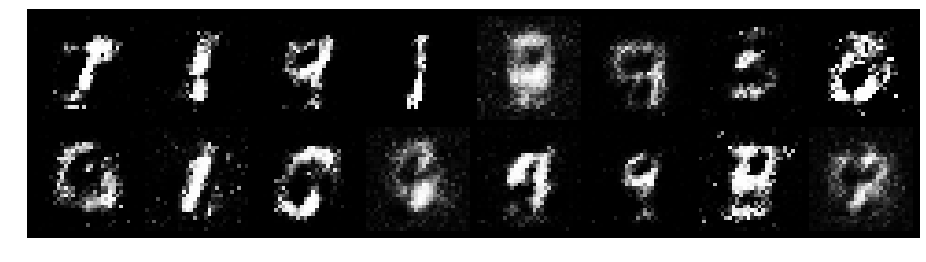

Epoch: [13/200], Batch Num: [0/600]
Discriminator Loss: 0.6080, Generator Loss: 1.8314
D(x): 0.8097, D(G(z)): 0.2419


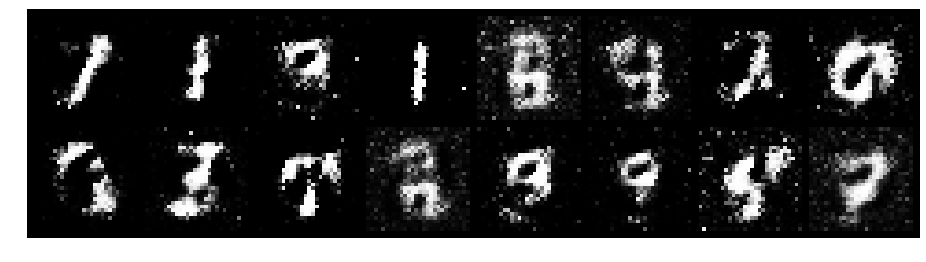

Epoch: [13/200], Batch Num: [300/600]
Discriminator Loss: 0.6970, Generator Loss: 2.7546
D(x): 0.7272, D(G(z)): 0.1364


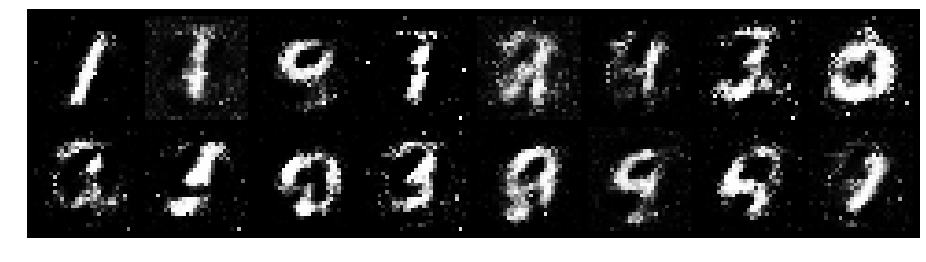

Epoch: [14/200], Batch Num: [0/600]
Discriminator Loss: 0.7647, Generator Loss: 2.2593
D(x): 0.7154, D(G(z)): 0.1690


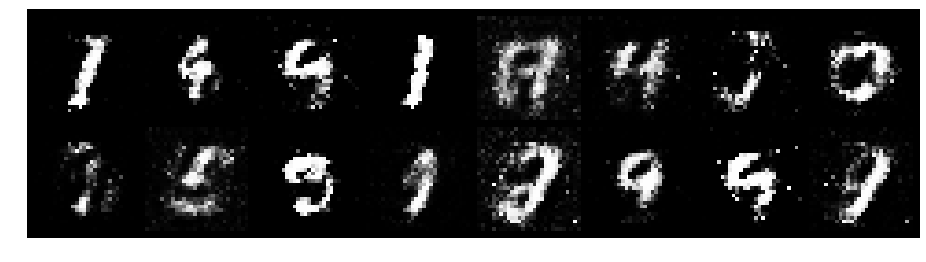

Epoch: [14/200], Batch Num: [300/600]
Discriminator Loss: 0.6538, Generator Loss: 2.5464
D(x): 0.7799, D(G(z)): 0.1563


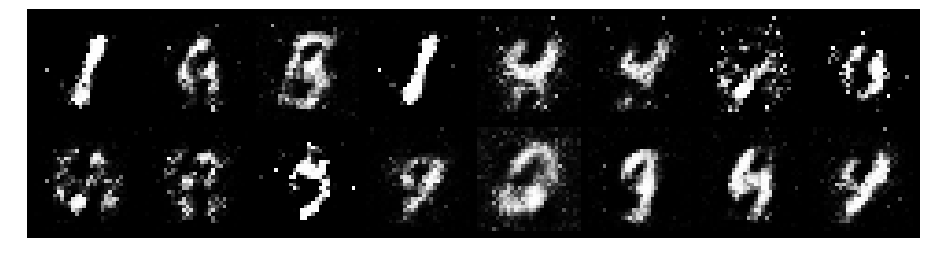

Epoch: [15/200], Batch Num: [0/600]
Discriminator Loss: 0.7692, Generator Loss: 1.9724
D(x): 0.7607, D(G(z)): 0.2099


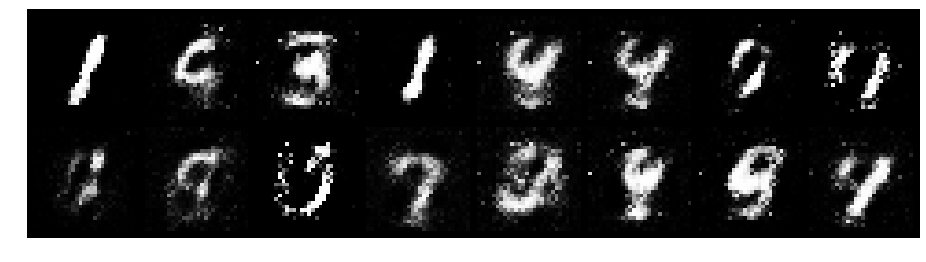

Epoch: [15/200], Batch Num: [300/600]
Discriminator Loss: 0.6540, Generator Loss: 1.5285
D(x): 0.7909, D(G(z)): 0.2537


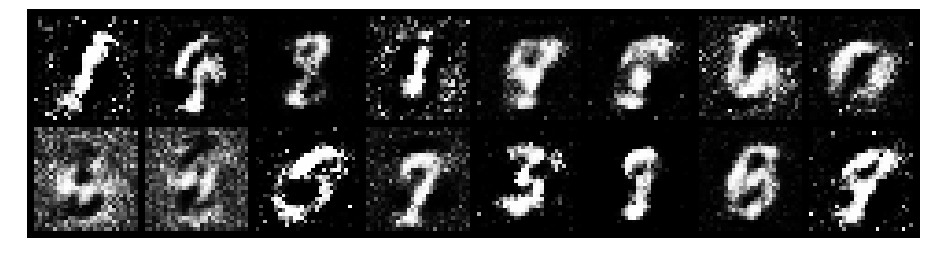

Epoch: [16/200], Batch Num: [0/600]
Discriminator Loss: 0.8984, Generator Loss: 1.8177
D(x): 0.7968, D(G(z)): 0.3418


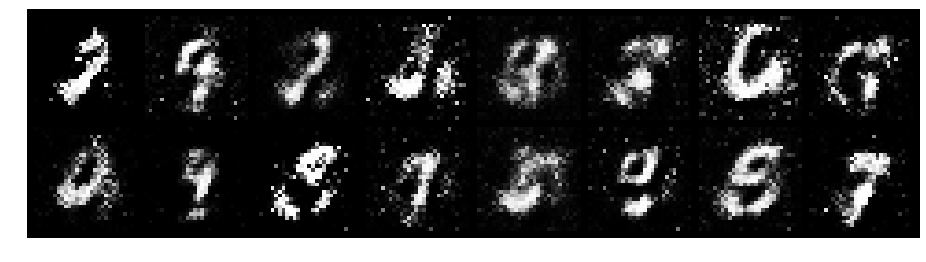

Epoch: [16/200], Batch Num: [300/600]
Discriminator Loss: 1.0153, Generator Loss: 1.5444
D(x): 0.6018, D(G(z)): 0.2866


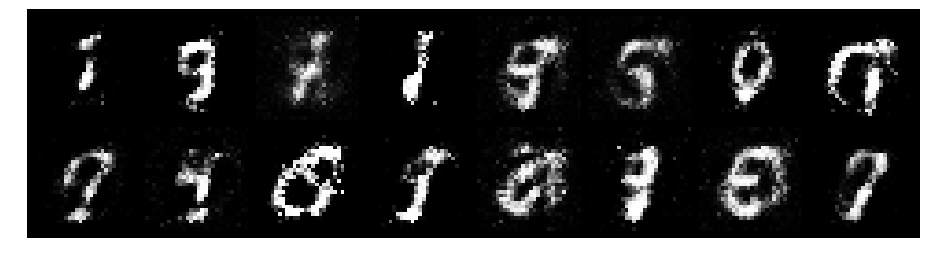

Epoch: [17/200], Batch Num: [0/600]
Discriminator Loss: 0.4031, Generator Loss: 2.7580
D(x): 0.9148, D(G(z)): 0.2085


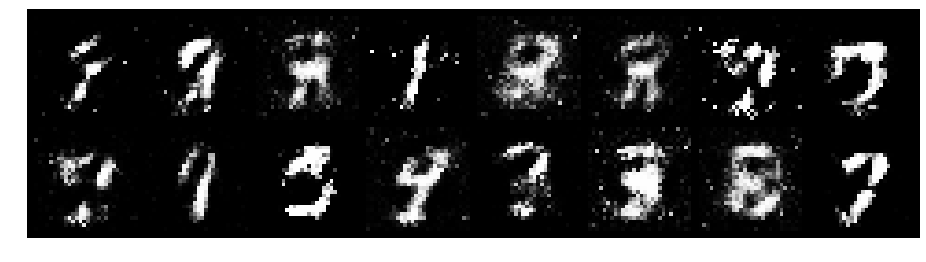

Epoch: [17/200], Batch Num: [300/600]
Discriminator Loss: 0.6892, Generator Loss: 2.0911
D(x): 0.7555, D(G(z)): 0.2125


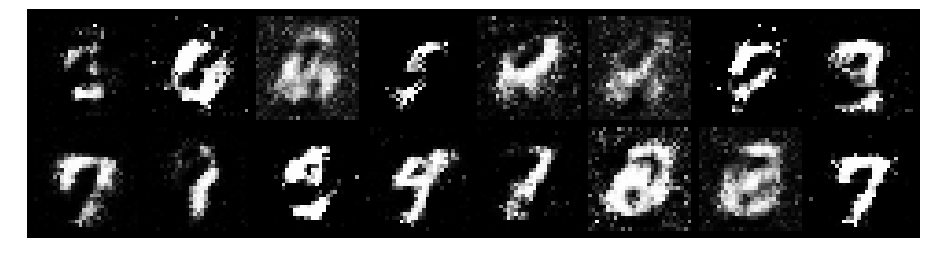

Epoch: [18/200], Batch Num: [0/600]
Discriminator Loss: 0.9475, Generator Loss: 1.7753
D(x): 0.7962, D(G(z)): 0.3152


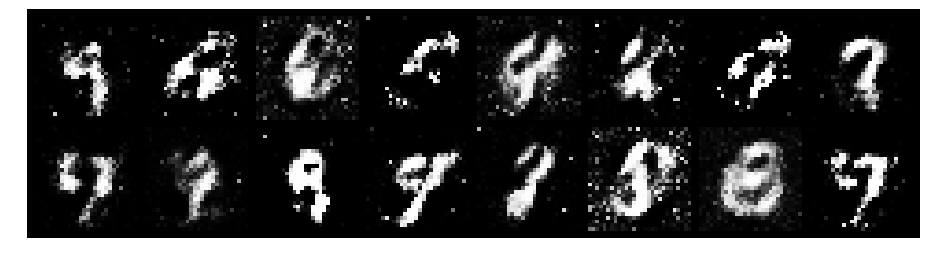

Epoch: [18/200], Batch Num: [300/600]
Discriminator Loss: 0.9353, Generator Loss: 1.3519
D(x): 0.7638, D(G(z)): 0.3778


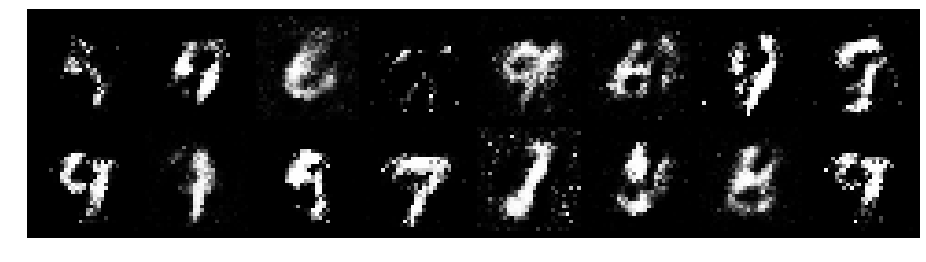

Epoch: [19/200], Batch Num: [0/600]
Discriminator Loss: 0.8035, Generator Loss: 1.6577
D(x): 0.7071, D(G(z)): 0.2441


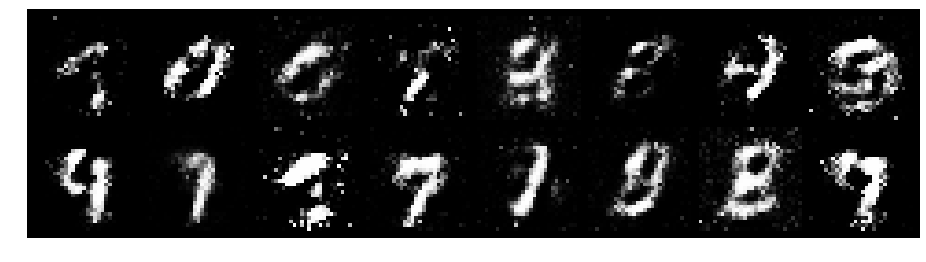

Epoch: [19/200], Batch Num: [300/600]
Discriminator Loss: 0.8004, Generator Loss: 2.0358
D(x): 0.7467, D(G(z)): 0.2418


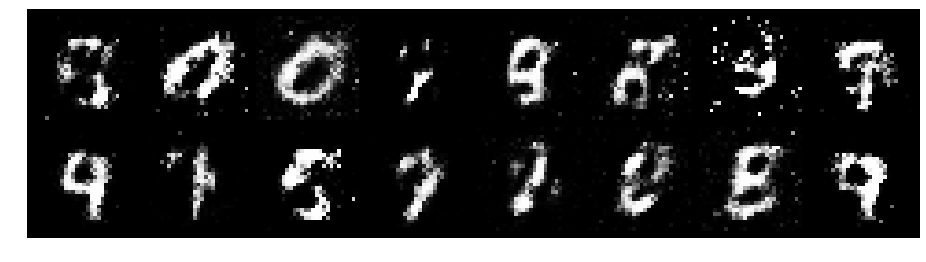

Epoch: [20/200], Batch Num: [0/600]
Discriminator Loss: 0.7382, Generator Loss: 1.9040
D(x): 0.7522, D(G(z)): 0.2475


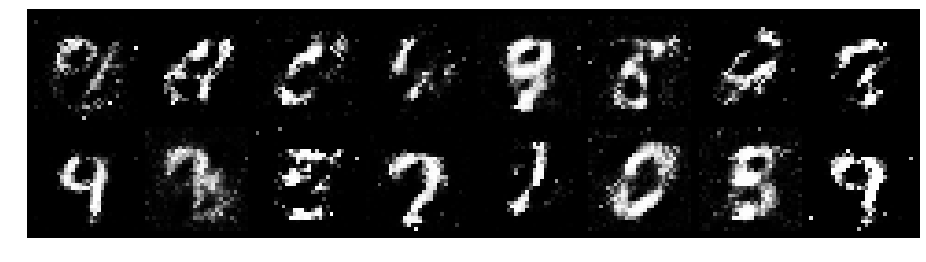

Epoch: [20/200], Batch Num: [300/600]
Discriminator Loss: 1.1174, Generator Loss: 1.3339
D(x): 0.6437, D(G(z)): 0.3421


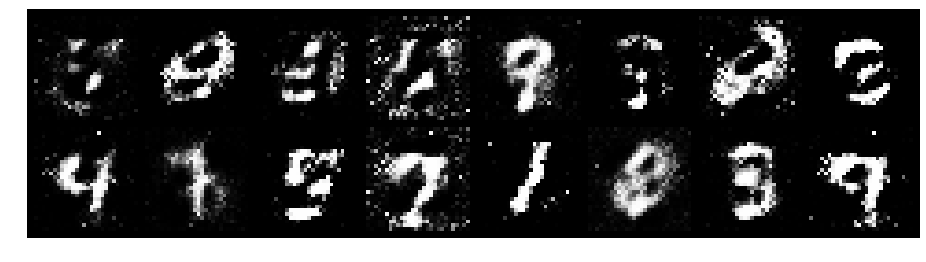

Epoch: [21/200], Batch Num: [0/600]
Discriminator Loss: 0.6846, Generator Loss: 2.1521
D(x): 0.7797, D(G(z)): 0.2272


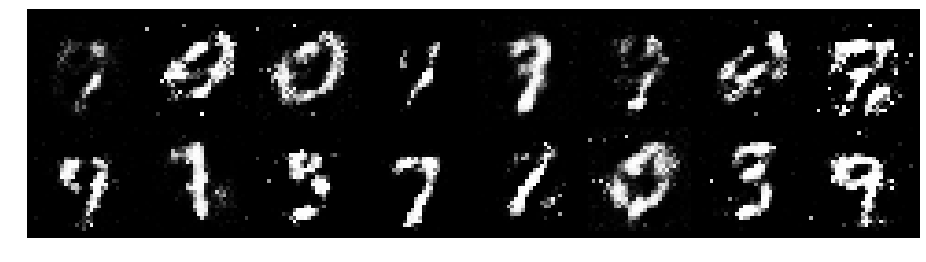

Epoch: [21/200], Batch Num: [300/600]
Discriminator Loss: 0.9828, Generator Loss: 1.1617
D(x): 0.7166, D(G(z)): 0.3546


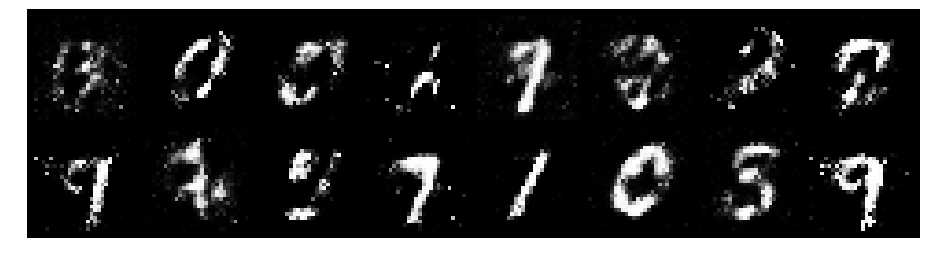

Epoch: [22/200], Batch Num: [0/600]
Discriminator Loss: 1.0018, Generator Loss: 1.4109
D(x): 0.6387, D(G(z)): 0.2968


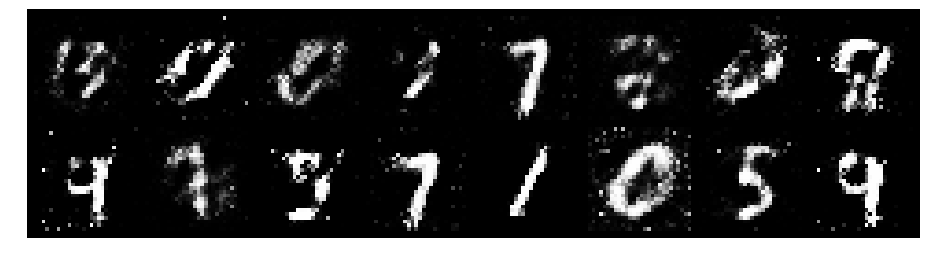

Epoch: [22/200], Batch Num: [300/600]
Discriminator Loss: 0.9496, Generator Loss: 1.6705
D(x): 0.6884, D(G(z)): 0.3183


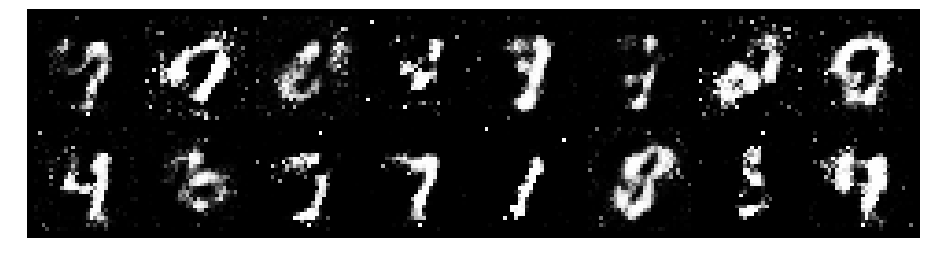

Epoch: [23/200], Batch Num: [0/600]
Discriminator Loss: 0.8682, Generator Loss: 1.9635
D(x): 0.7470, D(G(z)): 0.3070


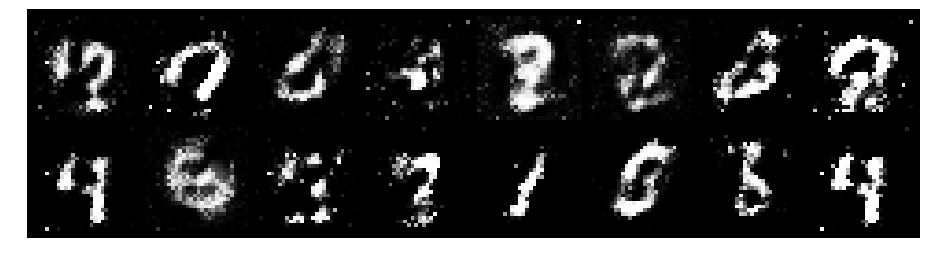

Epoch: [23/200], Batch Num: [300/600]
Discriminator Loss: 0.8757, Generator Loss: 1.4741
D(x): 0.7162, D(G(z)): 0.2998


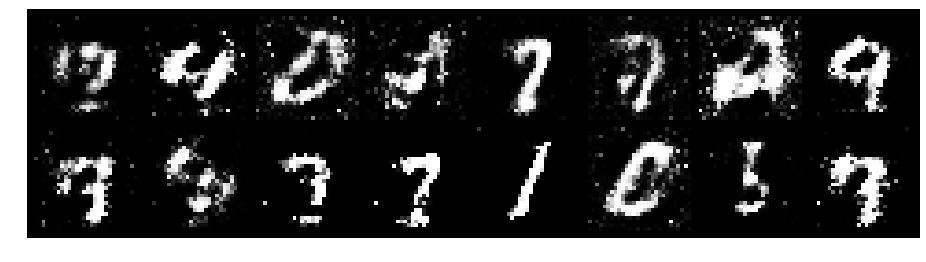

Epoch: [24/200], Batch Num: [0/600]
Discriminator Loss: 1.3102, Generator Loss: 0.8069
D(x): 0.6465, D(G(z)): 0.4897


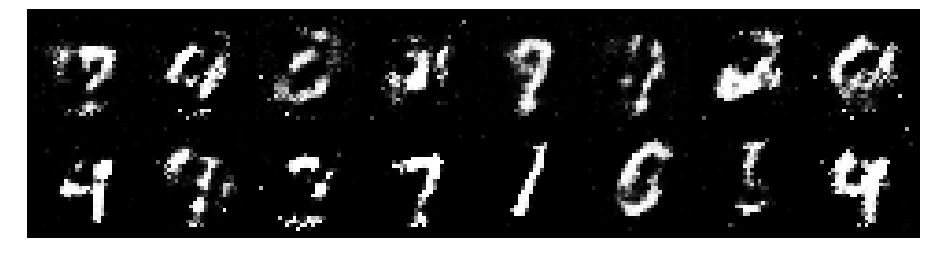

Epoch: [24/200], Batch Num: [300/600]
Discriminator Loss: 1.1146, Generator Loss: 1.6561
D(x): 0.6705, D(G(z)): 0.3246


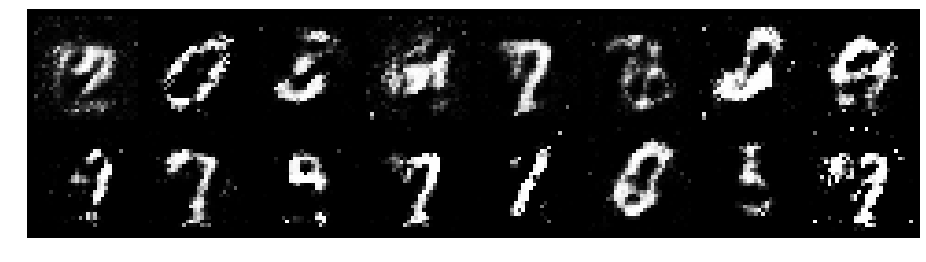

Epoch: [25/200], Batch Num: [0/600]
Discriminator Loss: 1.0556, Generator Loss: 1.7672
D(x): 0.6571, D(G(z)): 0.3178


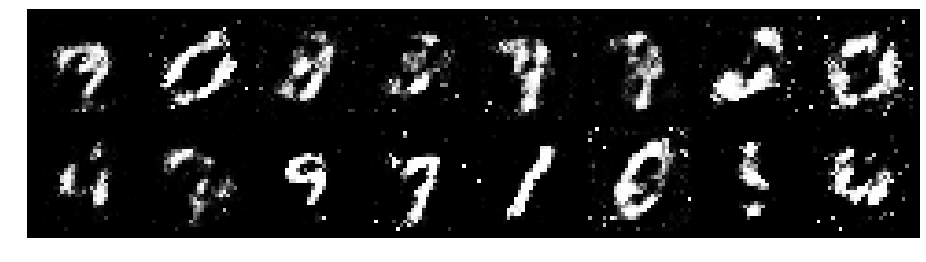

Epoch: [25/200], Batch Num: [300/600]
Discriminator Loss: 1.0675, Generator Loss: 1.7443
D(x): 0.7785, D(G(z)): 0.3987


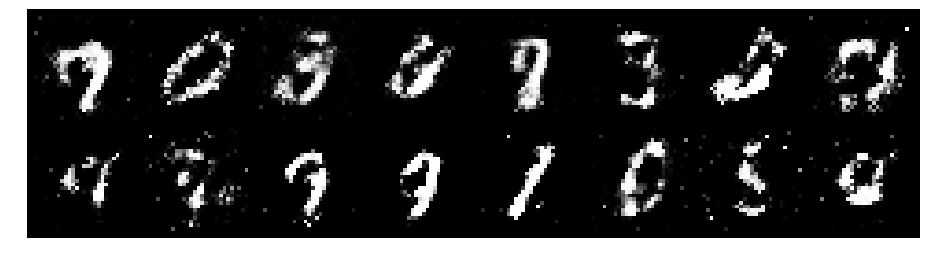

Epoch: [26/200], Batch Num: [0/600]
Discriminator Loss: 0.9234, Generator Loss: 1.5288
D(x): 0.7229, D(G(z)): 0.3250


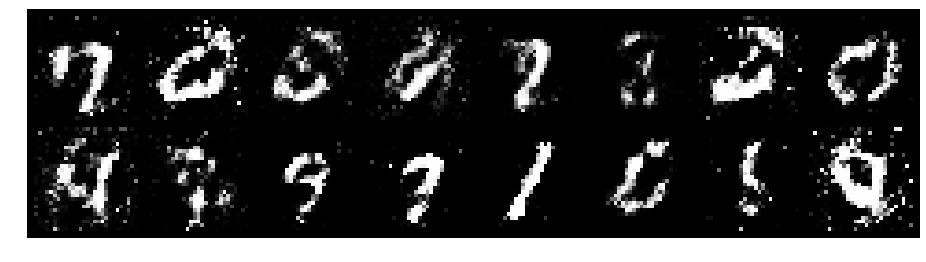

Epoch: [26/200], Batch Num: [300/600]
Discriminator Loss: 1.0097, Generator Loss: 1.5085
D(x): 0.6838, D(G(z)): 0.3423


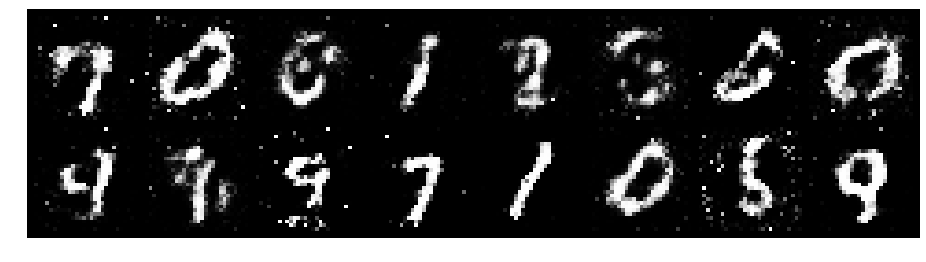

Epoch: [27/200], Batch Num: [0/600]
Discriminator Loss: 1.0560, Generator Loss: 1.0655
D(x): 0.7376, D(G(z)): 0.3933


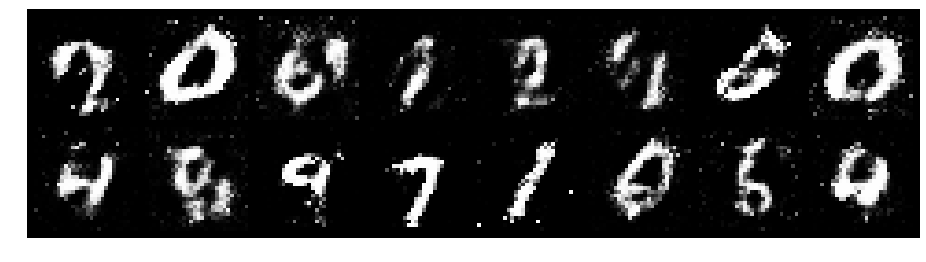

Epoch: [27/200], Batch Num: [300/600]
Discriminator Loss: 1.1480, Generator Loss: 1.2908
D(x): 0.6764, D(G(z)): 0.4037


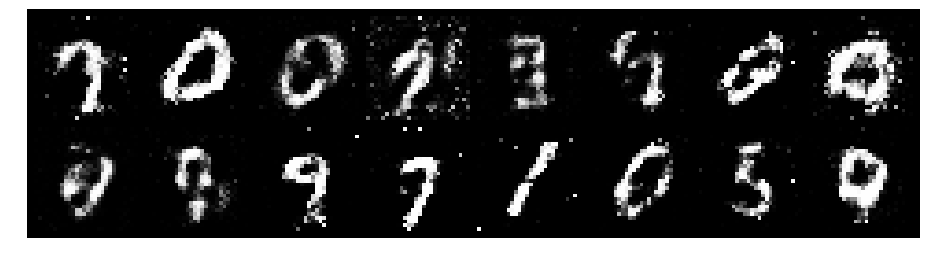

Epoch: [28/200], Batch Num: [0/600]
Discriminator Loss: 0.9632, Generator Loss: 1.8745
D(x): 0.7336, D(G(z)): 0.3560


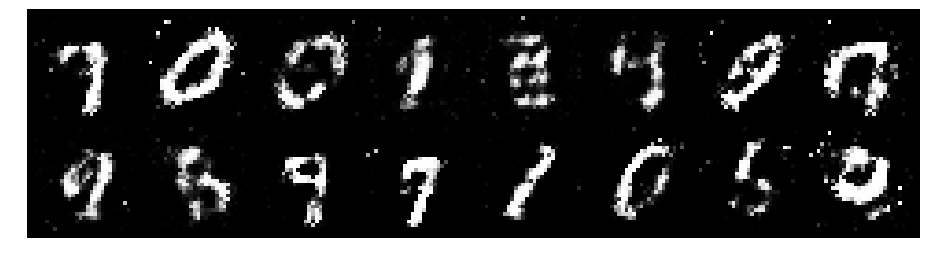

Epoch: [28/200], Batch Num: [300/600]
Discriminator Loss: 0.8819, Generator Loss: 1.1068
D(x): 0.7556, D(G(z)): 0.3723


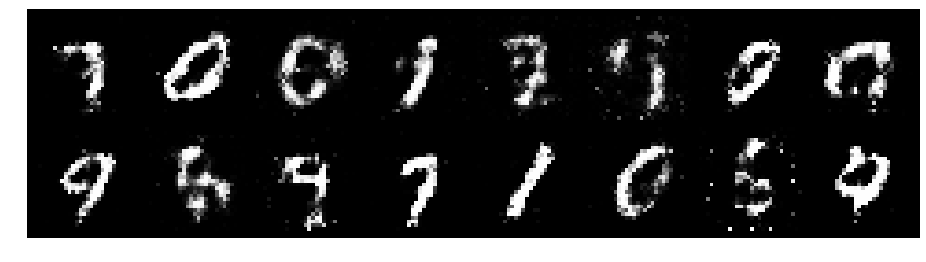

Epoch: [29/200], Batch Num: [0/600]
Discriminator Loss: 1.0446, Generator Loss: 1.4309
D(x): 0.6735, D(G(z)): 0.3549


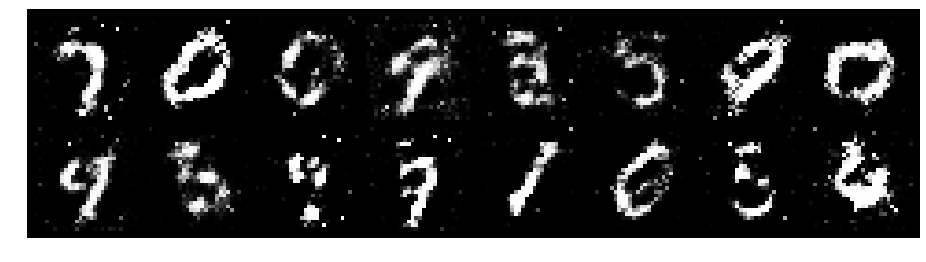

Epoch: [29/200], Batch Num: [300/600]
Discriminator Loss: 0.9084, Generator Loss: 1.8311
D(x): 0.6710, D(G(z)): 0.2597


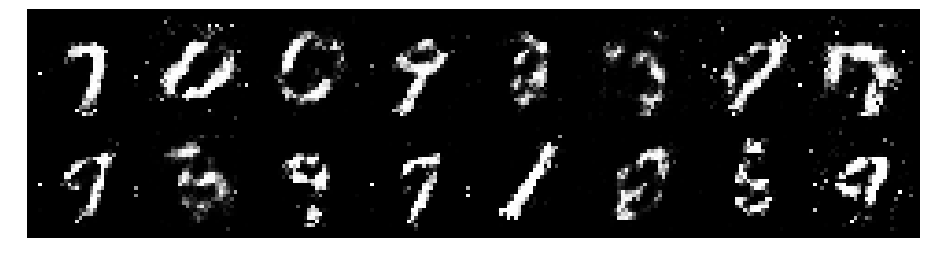

Epoch: [30/200], Batch Num: [0/600]
Discriminator Loss: 0.6174, Generator Loss: 2.0912
D(x): 0.7320, D(G(z)): 0.1912


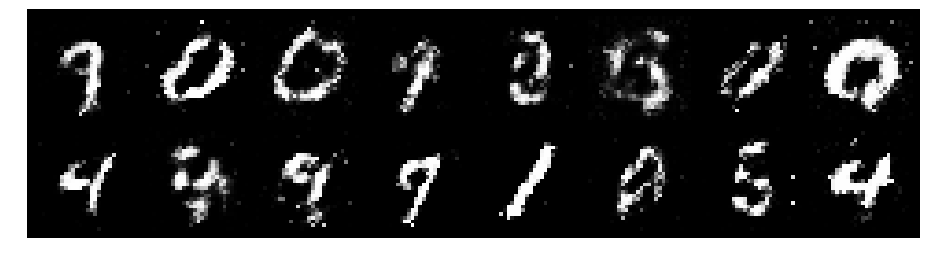

Epoch: [30/200], Batch Num: [300/600]
Discriminator Loss: 0.9975, Generator Loss: 1.3130
D(x): 0.6754, D(G(z)): 0.3313


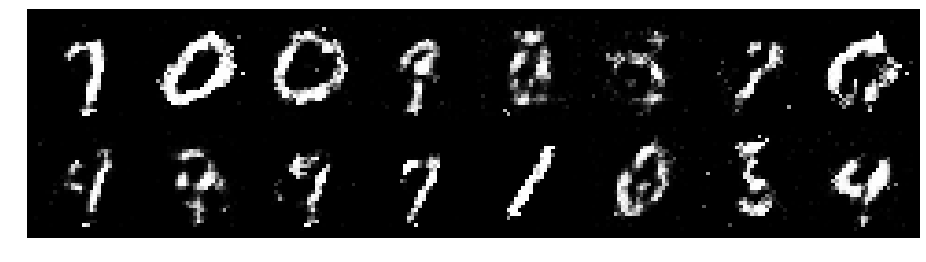

Epoch: [31/200], Batch Num: [0/600]
Discriminator Loss: 1.0908, Generator Loss: 1.3673
D(x): 0.6395, D(G(z)): 0.3347


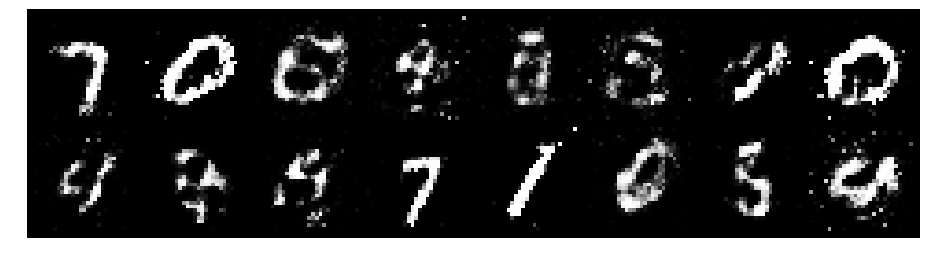

Epoch: [31/200], Batch Num: [300/600]
Discriminator Loss: 1.0219, Generator Loss: 1.9886
D(x): 0.6237, D(G(z)): 0.2151


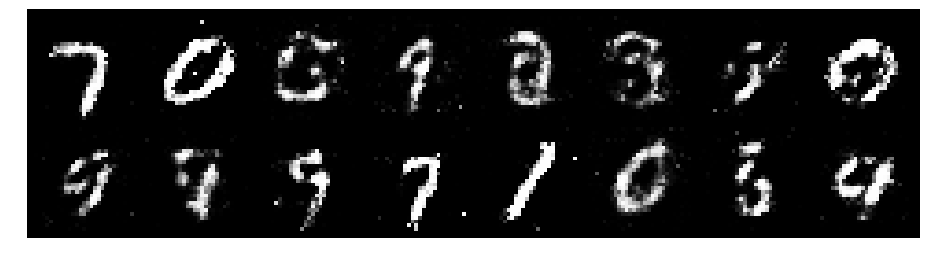

Epoch: [32/200], Batch Num: [0/600]
Discriminator Loss: 1.0351, Generator Loss: 1.5281
D(x): 0.6431, D(G(z)): 0.3072


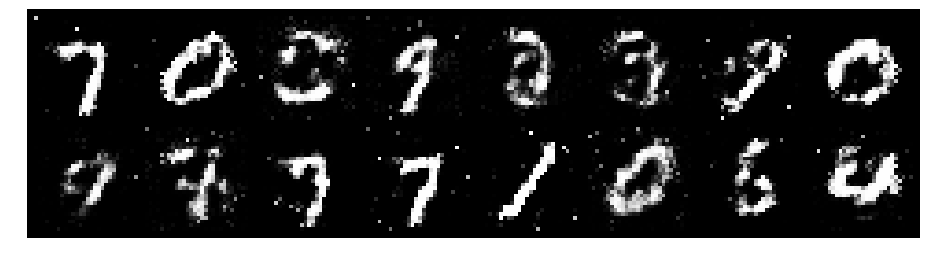

Epoch: [32/200], Batch Num: [300/600]
Discriminator Loss: 0.9189, Generator Loss: 1.3989
D(x): 0.6554, D(G(z)): 0.2869


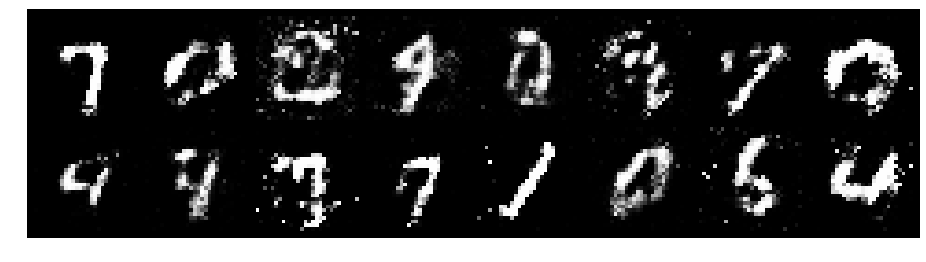

Epoch: [33/200], Batch Num: [0/600]
Discriminator Loss: 0.8664, Generator Loss: 1.4751
D(x): 0.7027, D(G(z)): 0.2978


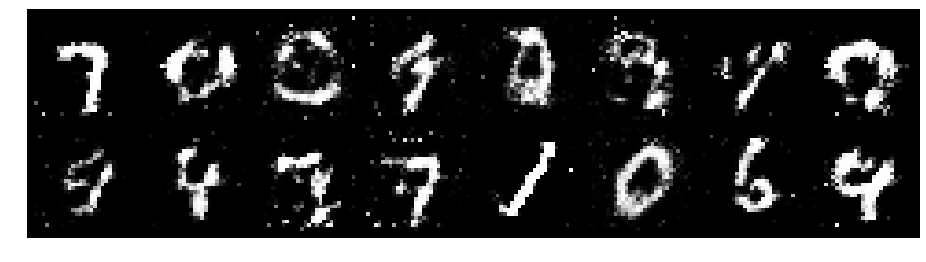

Epoch: [33/200], Batch Num: [300/600]
Discriminator Loss: 1.0559, Generator Loss: 1.3801
D(x): 0.6157, D(G(z)): 0.3189


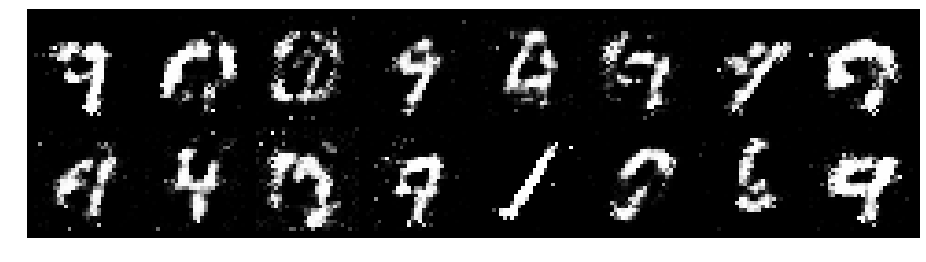

Epoch: [34/200], Batch Num: [0/600]
Discriminator Loss: 1.0911, Generator Loss: 1.1669
D(x): 0.6394, D(G(z)): 0.3828


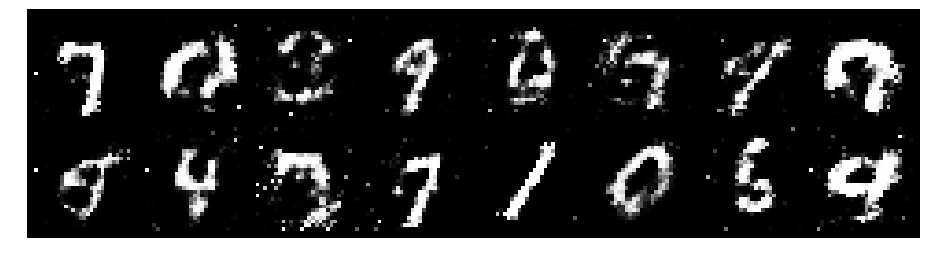

Epoch: [34/200], Batch Num: [300/600]
Discriminator Loss: 1.2617, Generator Loss: 1.3885
D(x): 0.6416, D(G(z)): 0.4032


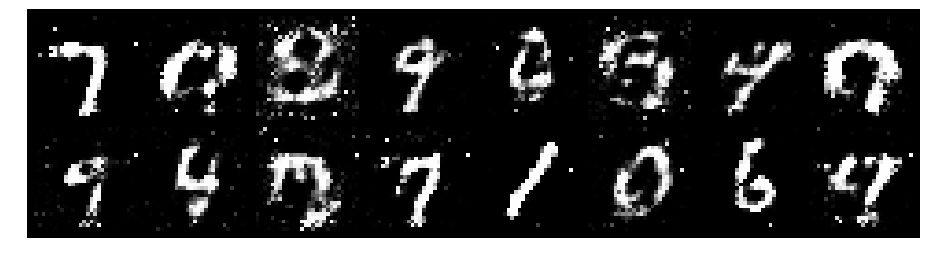

Epoch: [35/200], Batch Num: [0/600]
Discriminator Loss: 1.0376, Generator Loss: 1.2350
D(x): 0.6989, D(G(z)): 0.3844


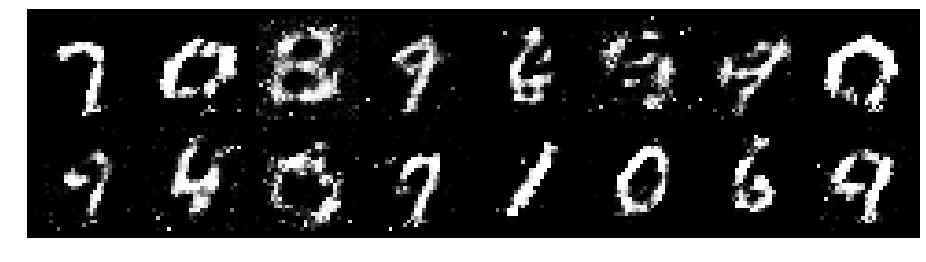

Epoch: [35/200], Batch Num: [300/600]
Discriminator Loss: 1.0374, Generator Loss: 1.4808
D(x): 0.5925, D(G(z)): 0.2575


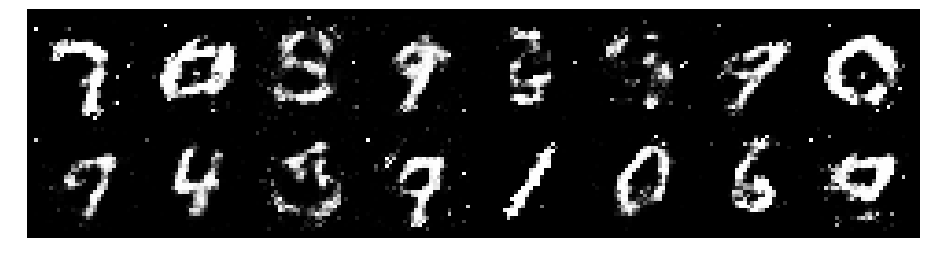

Epoch: [36/200], Batch Num: [0/600]
Discriminator Loss: 1.1379, Generator Loss: 1.2424
D(x): 0.6293, D(G(z)): 0.3695


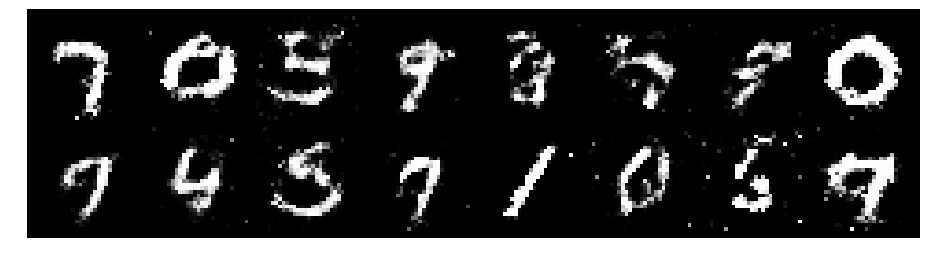

Epoch: [36/200], Batch Num: [300/600]
Discriminator Loss: 0.9996, Generator Loss: 1.2036
D(x): 0.6906, D(G(z)): 0.3854


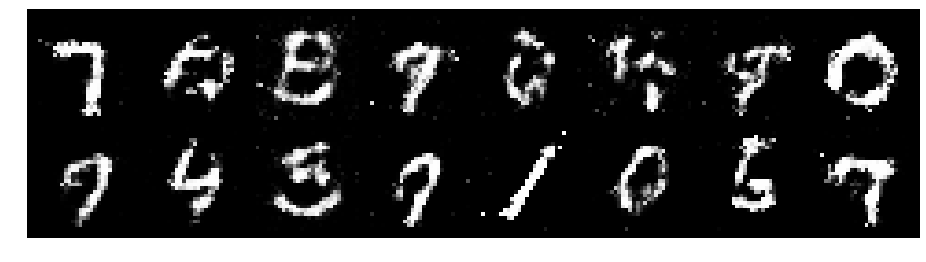

Epoch: [37/200], Batch Num: [0/600]
Discriminator Loss: 1.0077, Generator Loss: 1.2427
D(x): 0.6434, D(G(z)): 0.3626


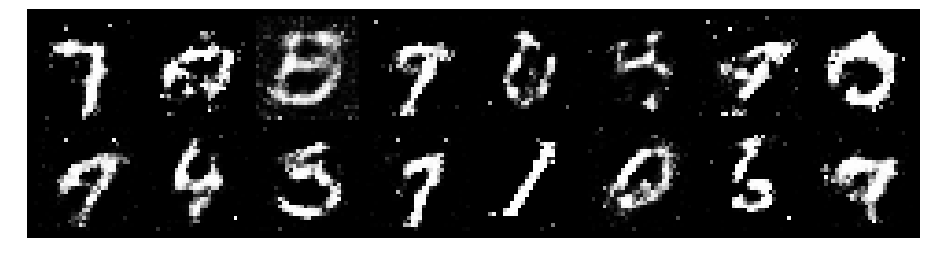

Epoch: [37/200], Batch Num: [300/600]
Discriminator Loss: 1.0587, Generator Loss: 1.1615
D(x): 0.6601, D(G(z)): 0.4031


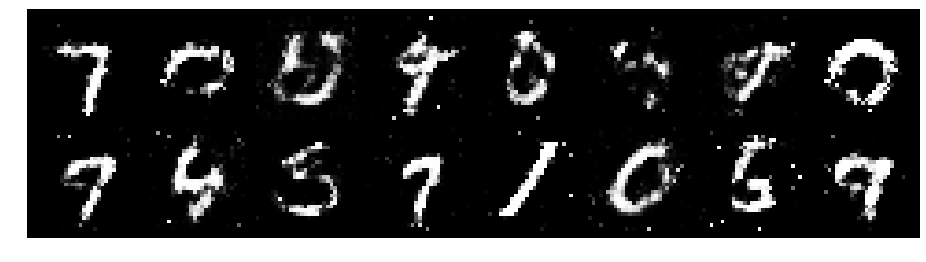

Epoch: [38/200], Batch Num: [0/600]
Discriminator Loss: 0.9160, Generator Loss: 1.3648
D(x): 0.6806, D(G(z)): 0.3096


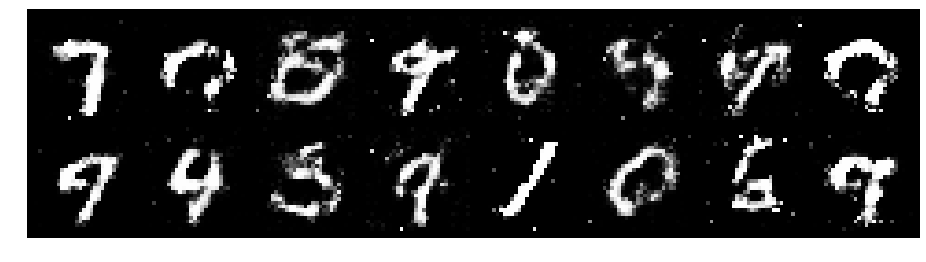

Epoch: [38/200], Batch Num: [300/600]
Discriminator Loss: 0.9105, Generator Loss: 1.5303
D(x): 0.6328, D(G(z)): 0.2709


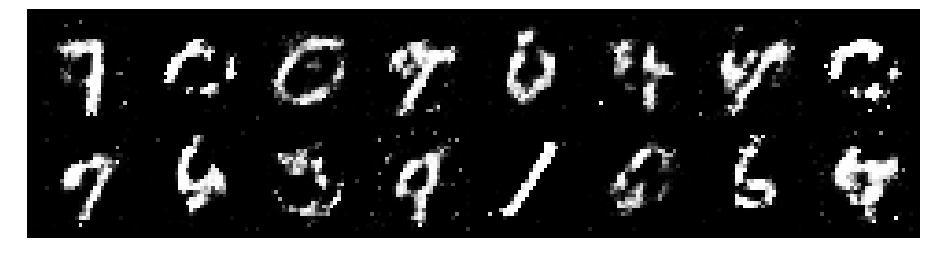

Epoch: [39/200], Batch Num: [0/600]
Discriminator Loss: 1.1898, Generator Loss: 0.9544
D(x): 0.5938, D(G(z)): 0.4115


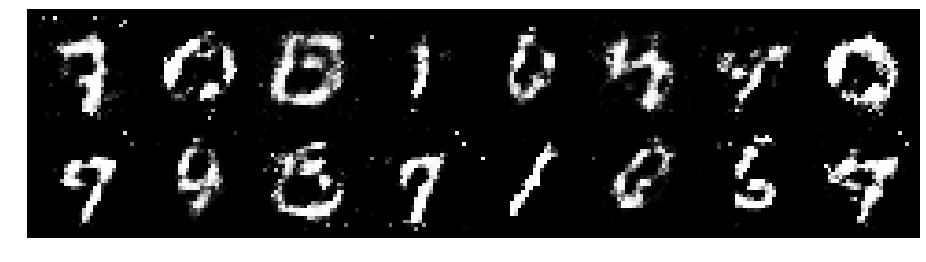

Epoch: [39/200], Batch Num: [300/600]
Discriminator Loss: 1.2104, Generator Loss: 1.0623
D(x): 0.6113, D(G(z)): 0.4255


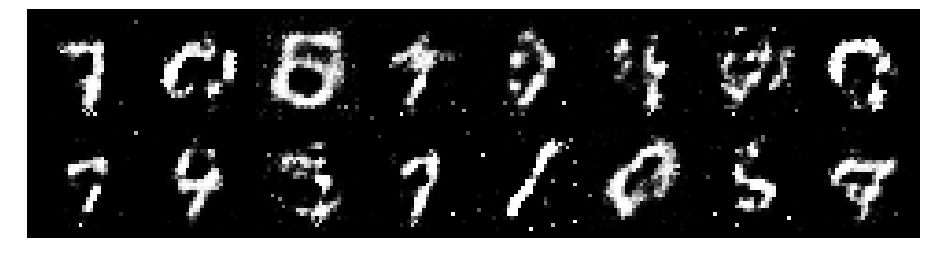

Epoch: [40/200], Batch Num: [0/600]
Discriminator Loss: 1.0865, Generator Loss: 1.1821
D(x): 0.6379, D(G(z)): 0.3785


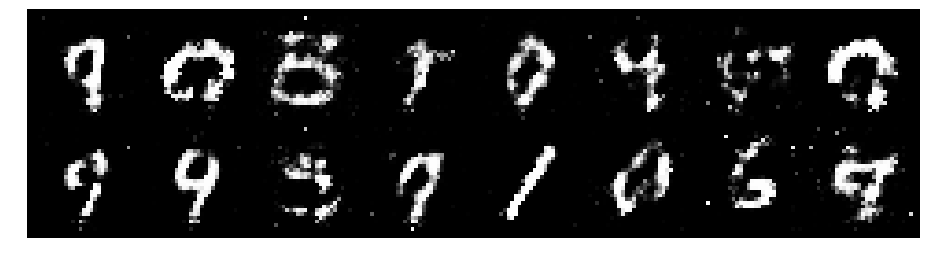

Epoch: [40/200], Batch Num: [300/600]
Discriminator Loss: 1.0606, Generator Loss: 1.2090
D(x): 0.6718, D(G(z)): 0.3988


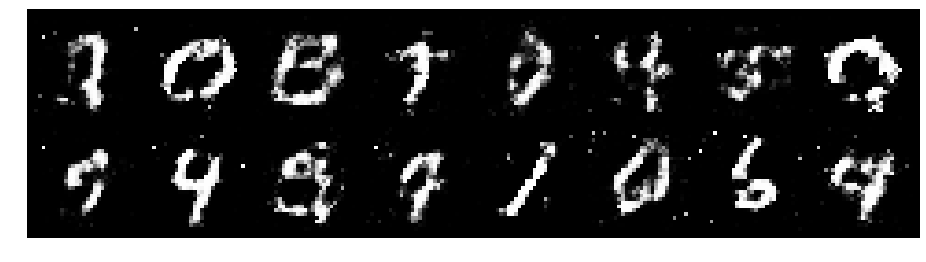

Epoch: [41/200], Batch Num: [0/600]
Discriminator Loss: 1.1604, Generator Loss: 1.2646
D(x): 0.5990, D(G(z)): 0.3889


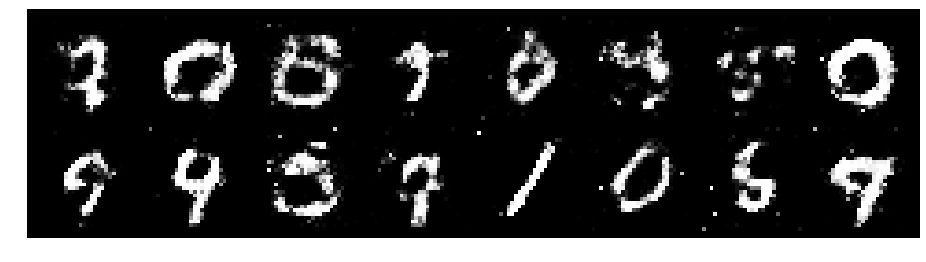

Epoch: [41/200], Batch Num: [300/600]
Discriminator Loss: 1.0956, Generator Loss: 1.1579
D(x): 0.6223, D(G(z)): 0.3842


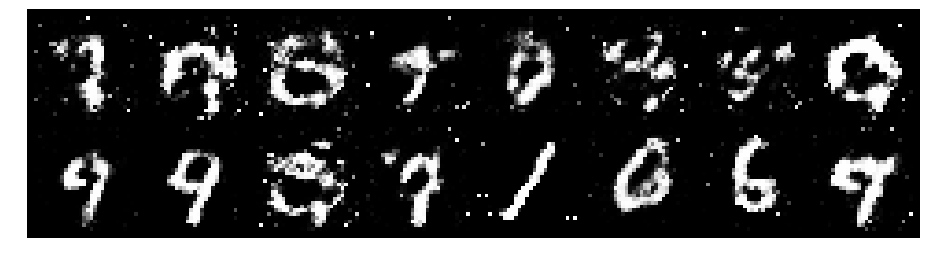

Epoch: [42/200], Batch Num: [0/600]
Discriminator Loss: 1.2160, Generator Loss: 1.3984
D(x): 0.5436, D(G(z)): 0.3664


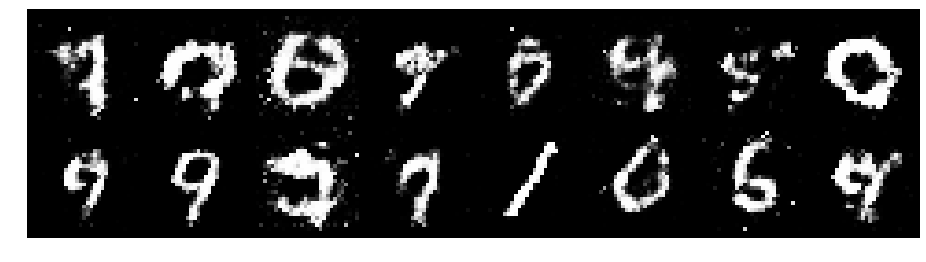

Epoch: [42/200], Batch Num: [300/600]
Discriminator Loss: 1.1353, Generator Loss: 1.0207
D(x): 0.6846, D(G(z)): 0.4471


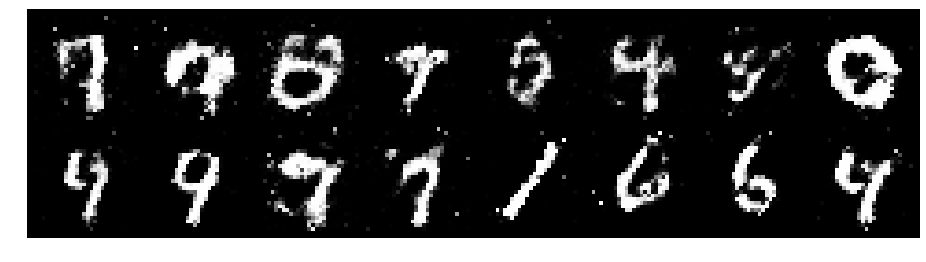

Epoch: [43/200], Batch Num: [0/600]
Discriminator Loss: 1.0308, Generator Loss: 1.3164
D(x): 0.6141, D(G(z)): 0.3103


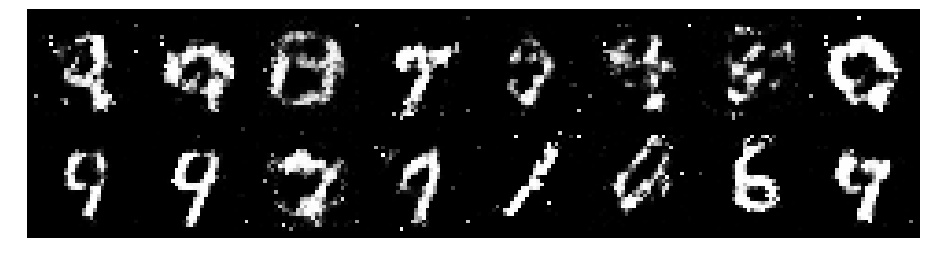

Epoch: [43/200], Batch Num: [300/600]
Discriminator Loss: 0.9813, Generator Loss: 1.2697
D(x): 0.7021, D(G(z)): 0.3854


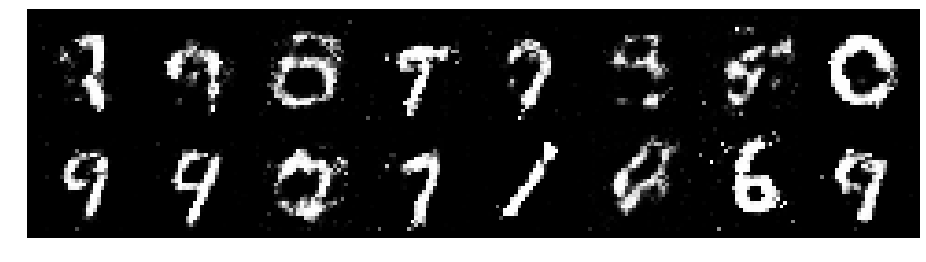

Epoch: [44/200], Batch Num: [0/600]
Discriminator Loss: 1.1598, Generator Loss: 1.1101
D(x): 0.6131, D(G(z)): 0.4054


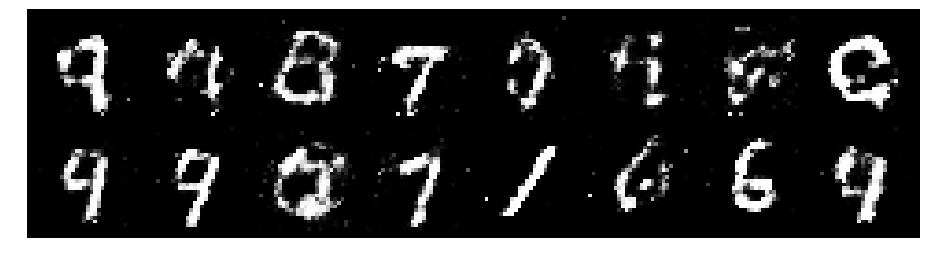

Epoch: [44/200], Batch Num: [300/600]
Discriminator Loss: 1.1443, Generator Loss: 1.1061
D(x): 0.6048, D(G(z)): 0.3942


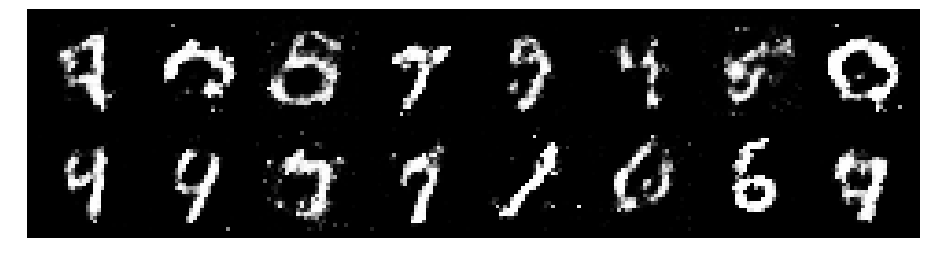

Epoch: [45/200], Batch Num: [0/600]
Discriminator Loss: 1.2045, Generator Loss: 0.9629
D(x): 0.5883, D(G(z)): 0.4155


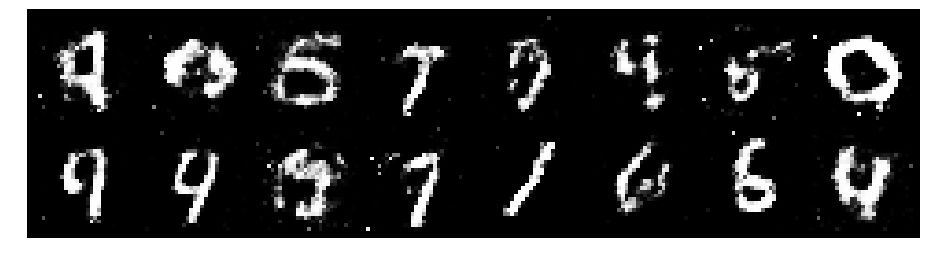

Epoch: [45/200], Batch Num: [300/600]
Discriminator Loss: 1.2480, Generator Loss: 0.9744
D(x): 0.6234, D(G(z)): 0.4432


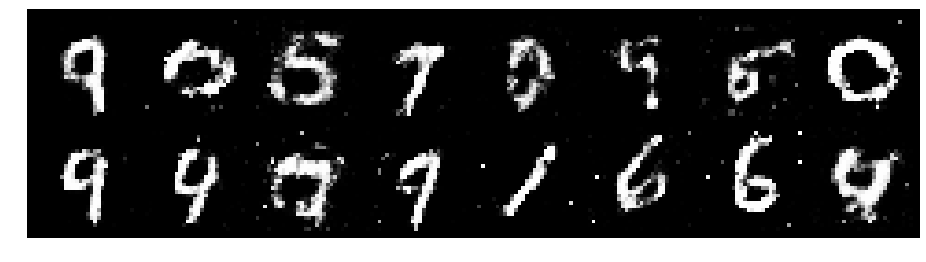

Epoch: [46/200], Batch Num: [0/600]
Discriminator Loss: 1.0784, Generator Loss: 1.2937
D(x): 0.5906, D(G(z)): 0.3260


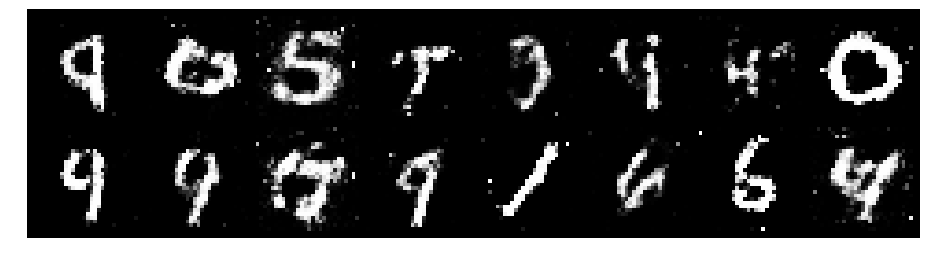

Epoch: [46/200], Batch Num: [300/600]
Discriminator Loss: 1.0044, Generator Loss: 1.1739
D(x): 0.6660, D(G(z)): 0.3760


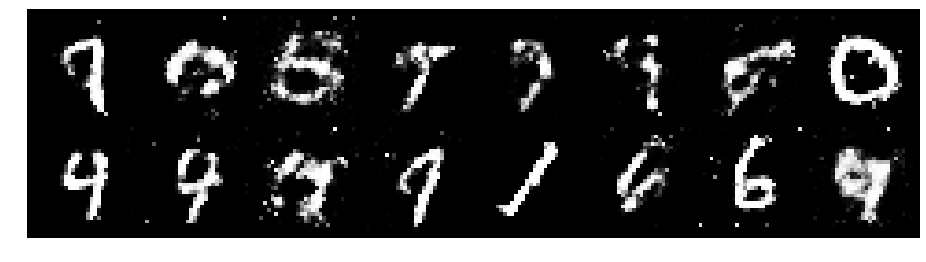

Epoch: [47/200], Batch Num: [0/600]
Discriminator Loss: 1.0809, Generator Loss: 1.1642
D(x): 0.6998, D(G(z)): 0.4103


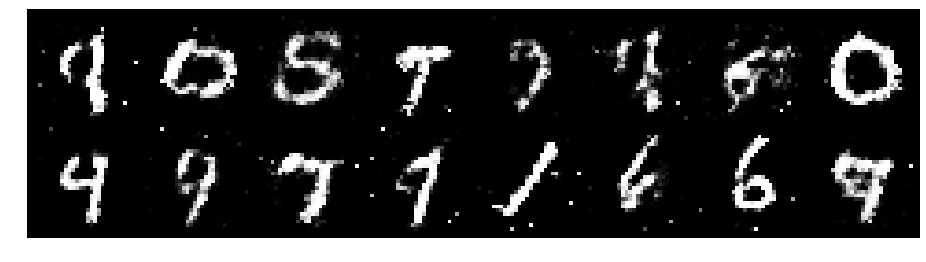

Epoch: [47/200], Batch Num: [300/600]
Discriminator Loss: 1.0997, Generator Loss: 1.2194
D(x): 0.5914, D(G(z)): 0.3487


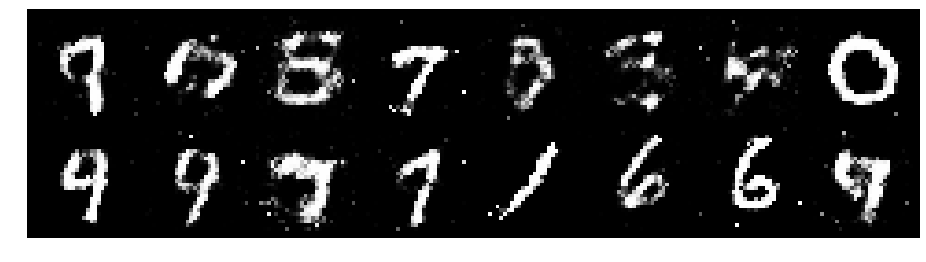

Epoch: [48/200], Batch Num: [0/600]
Discriminator Loss: 1.0615, Generator Loss: 1.2916
D(x): 0.6498, D(G(z)): 0.3776


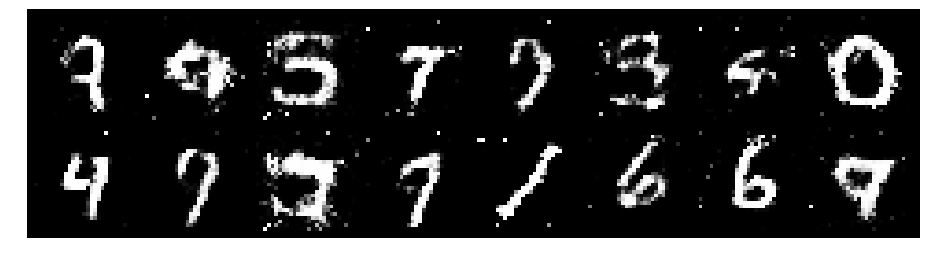

Epoch: [48/200], Batch Num: [300/600]
Discriminator Loss: 1.2241, Generator Loss: 1.2851
D(x): 0.5823, D(G(z)): 0.3858


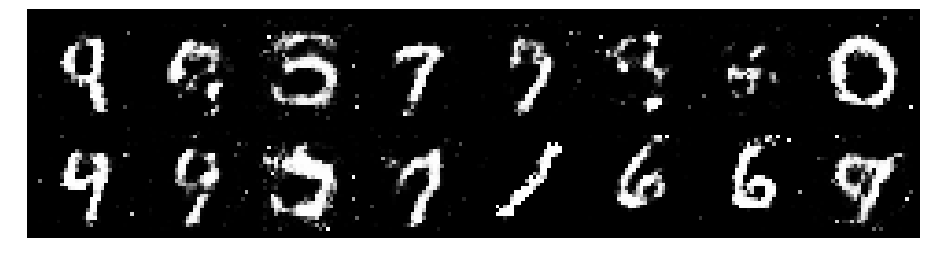

Epoch: [49/200], Batch Num: [0/600]
Discriminator Loss: 0.9474, Generator Loss: 1.2985
D(x): 0.7312, D(G(z)): 0.3770


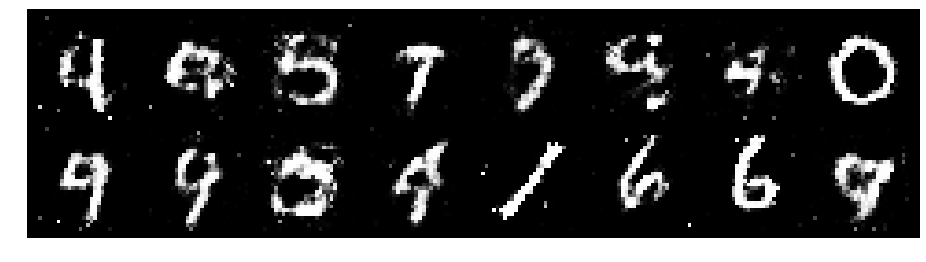

Epoch: [49/200], Batch Num: [300/600]
Discriminator Loss: 1.0708, Generator Loss: 1.1442
D(x): 0.6091, D(G(z)): 0.3236


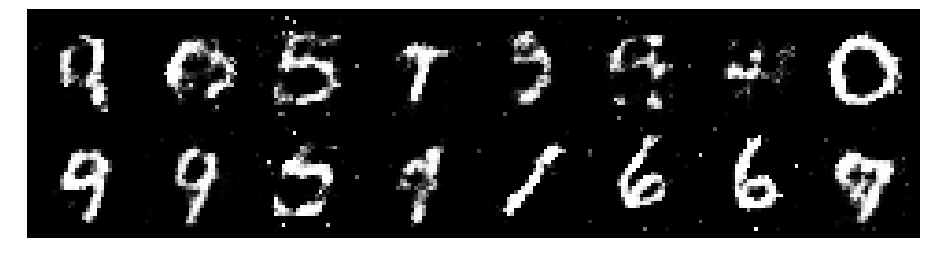

Epoch: [50/200], Batch Num: [0/600]
Discriminator Loss: 1.0509, Generator Loss: 1.1085
D(x): 0.6433, D(G(z)): 0.3856


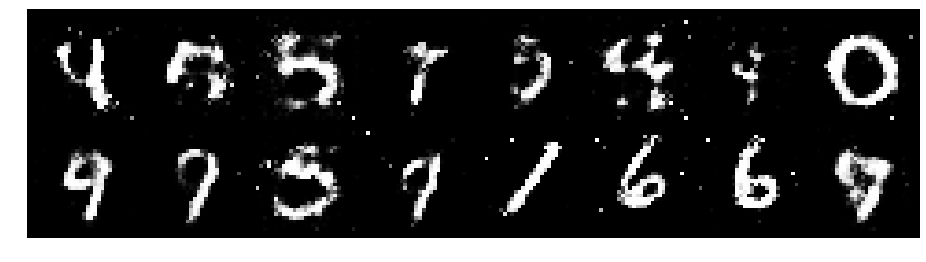

Epoch: [50/200], Batch Num: [300/600]
Discriminator Loss: 1.1527, Generator Loss: 1.0699
D(x): 0.6059, D(G(z)): 0.3985


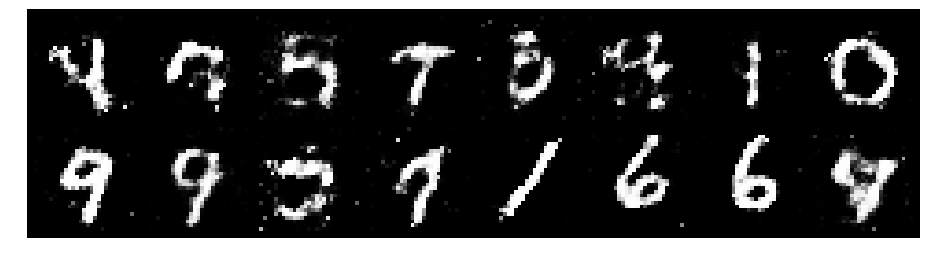

Epoch: [51/200], Batch Num: [0/600]
Discriminator Loss: 1.0947, Generator Loss: 1.4057
D(x): 0.6812, D(G(z)): 0.4088


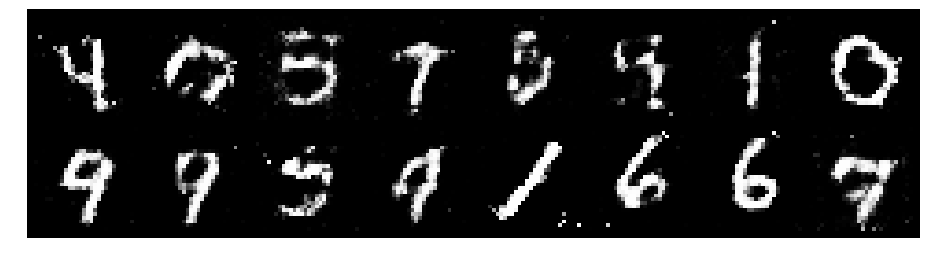

Epoch: [51/200], Batch Num: [300/600]
Discriminator Loss: 1.2079, Generator Loss: 1.2470
D(x): 0.6150, D(G(z)): 0.4144


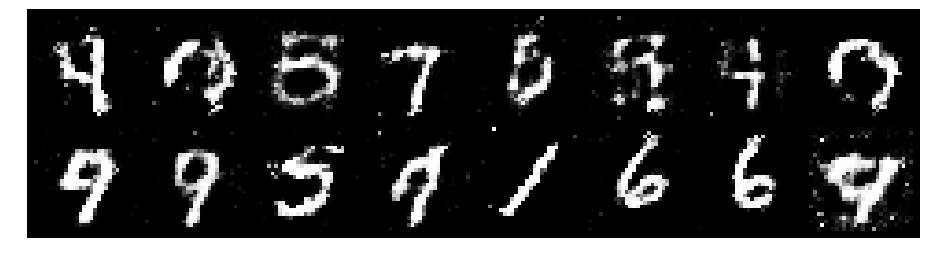

Epoch: [52/200], Batch Num: [0/600]
Discriminator Loss: 1.3489, Generator Loss: 0.8485
D(x): 0.5522, D(G(z)): 0.4503


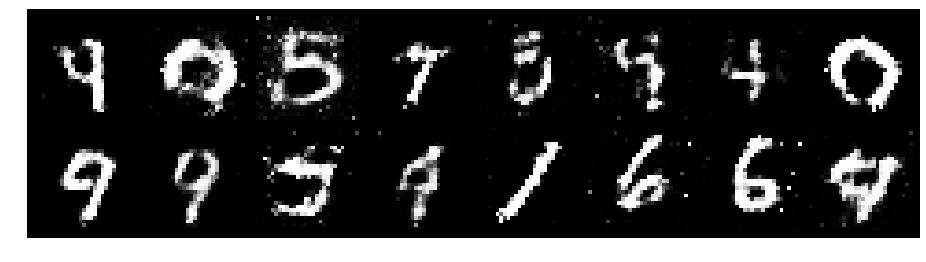

Epoch: [52/200], Batch Num: [300/600]
Discriminator Loss: 1.3245, Generator Loss: 1.1421
D(x): 0.5241, D(G(z)): 0.3889


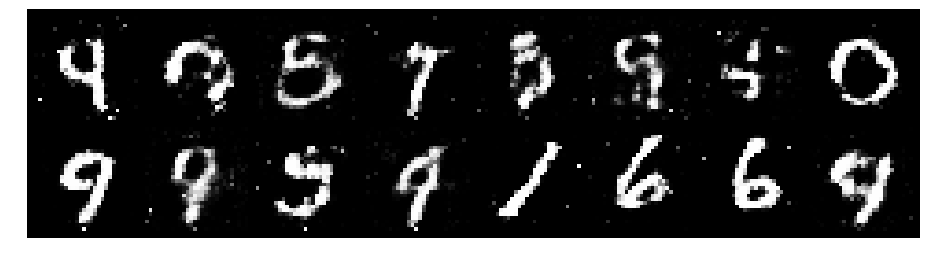

Epoch: [53/200], Batch Num: [0/600]
Discriminator Loss: 1.1915, Generator Loss: 0.9996
D(x): 0.5752, D(G(z)): 0.4054


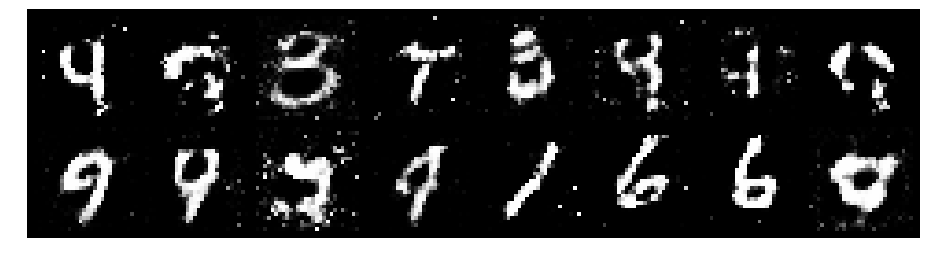

Epoch: [53/200], Batch Num: [300/600]
Discriminator Loss: 1.2990, Generator Loss: 0.8285
D(x): 0.5975, D(G(z)): 0.4748


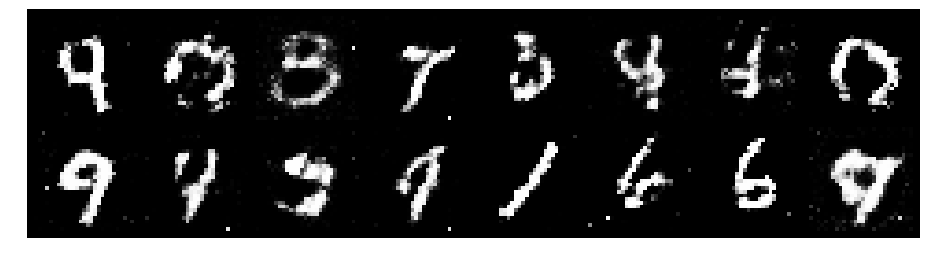

Epoch: [54/200], Batch Num: [0/600]
Discriminator Loss: 1.0555, Generator Loss: 1.1207
D(x): 0.6453, D(G(z)): 0.3868


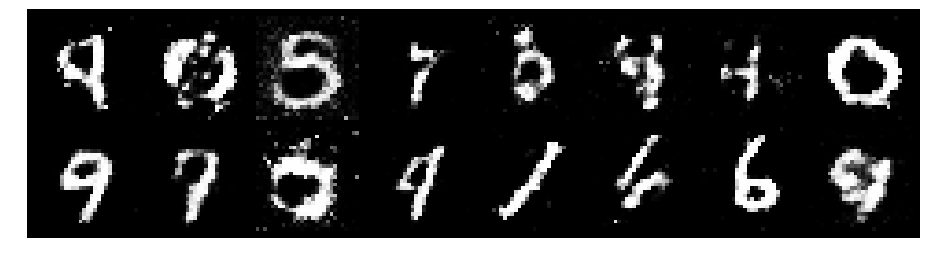

Epoch: [54/200], Batch Num: [300/600]
Discriminator Loss: 1.1184, Generator Loss: 1.1025
D(x): 0.6015, D(G(z)): 0.3726


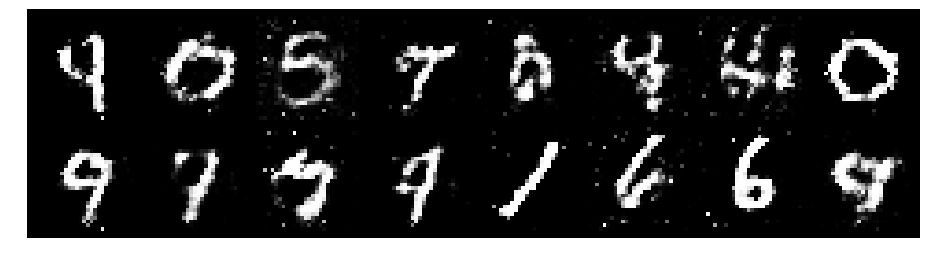

Epoch: [55/200], Batch Num: [0/600]
Discriminator Loss: 1.1360, Generator Loss: 0.9205
D(x): 0.6392, D(G(z)): 0.4243


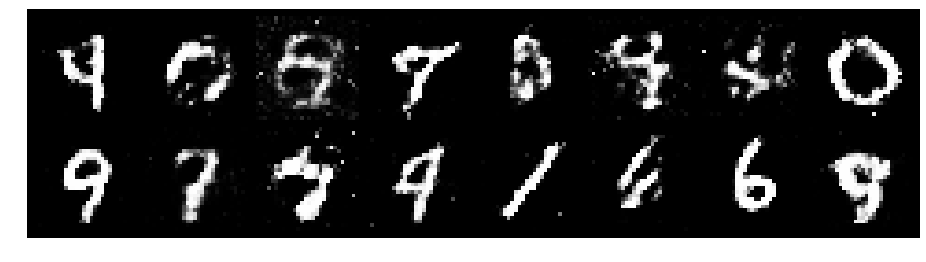

Epoch: [55/200], Batch Num: [300/600]
Discriminator Loss: 1.3334, Generator Loss: 1.0418
D(x): 0.5258, D(G(z)): 0.3952


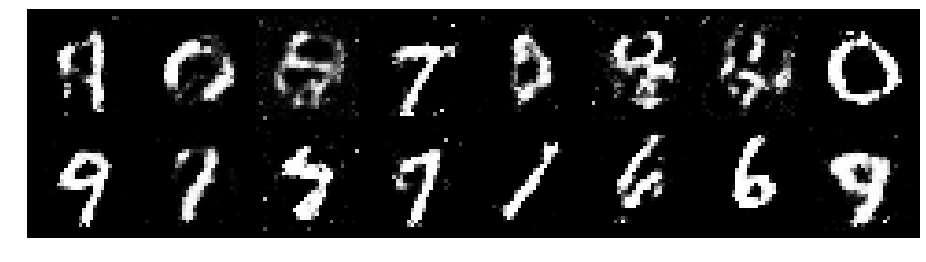

Epoch: [56/200], Batch Num: [0/600]
Discriminator Loss: 1.1866, Generator Loss: 1.0026
D(x): 0.5649, D(G(z)): 0.4004


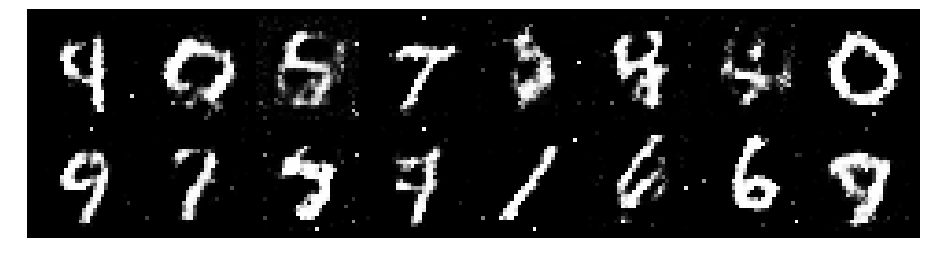

Epoch: [56/200], Batch Num: [300/600]
Discriminator Loss: 1.0408, Generator Loss: 1.1377
D(x): 0.6524, D(G(z)): 0.3894


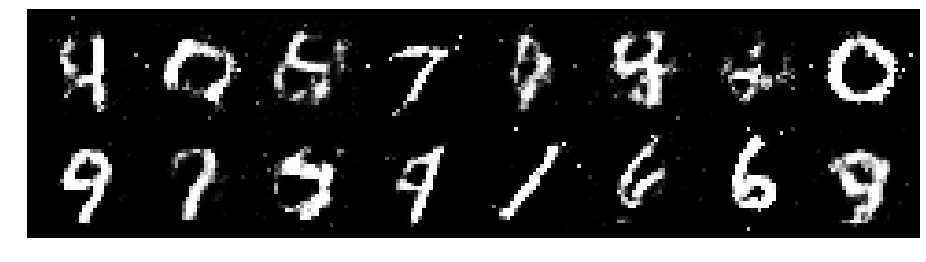

Epoch: [57/200], Batch Num: [0/600]
Discriminator Loss: 1.1967, Generator Loss: 1.4547
D(x): 0.6376, D(G(z)): 0.4184


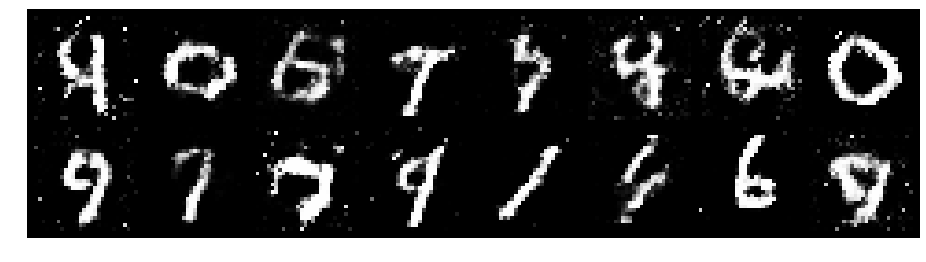

Epoch: [57/200], Batch Num: [300/600]
Discriminator Loss: 1.2381, Generator Loss: 1.1384
D(x): 0.5816, D(G(z)): 0.3952


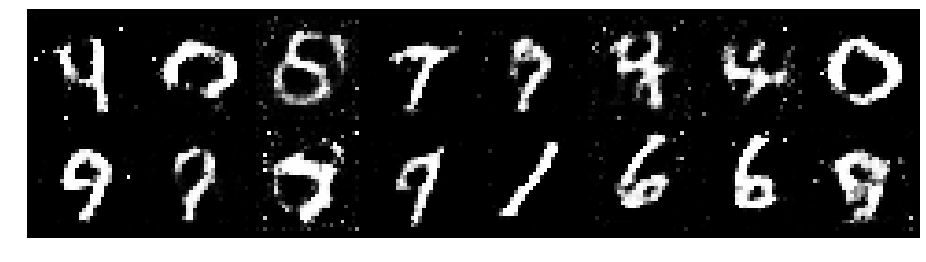

Epoch: [58/200], Batch Num: [0/600]
Discriminator Loss: 1.3662, Generator Loss: 1.1054
D(x): 0.5418, D(G(z)): 0.4082


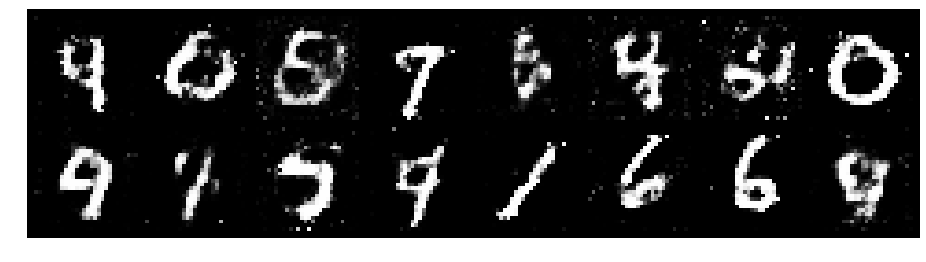

Epoch: [58/200], Batch Num: [300/600]
Discriminator Loss: 1.3335, Generator Loss: 0.9288
D(x): 0.5290, D(G(z)): 0.4259


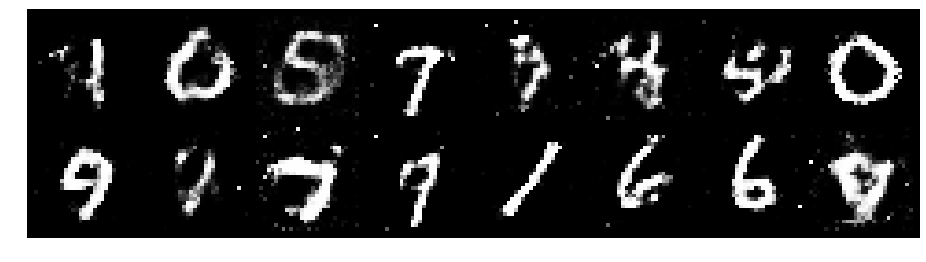

Epoch: [59/200], Batch Num: [0/600]
Discriminator Loss: 1.0102, Generator Loss: 1.2005
D(x): 0.6374, D(G(z)): 0.3636


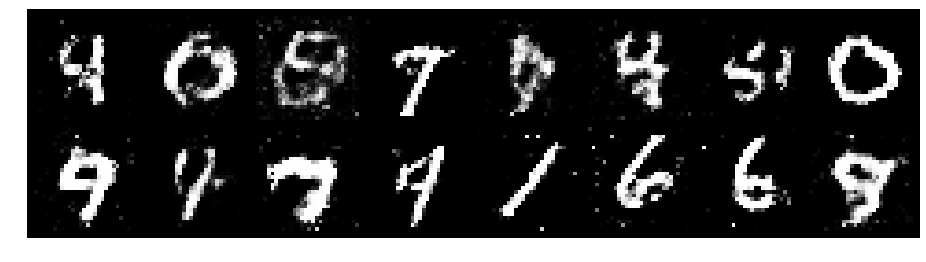

Epoch: [59/200], Batch Num: [300/600]
Discriminator Loss: 1.2110, Generator Loss: 1.0177
D(x): 0.5888, D(G(z)): 0.4328


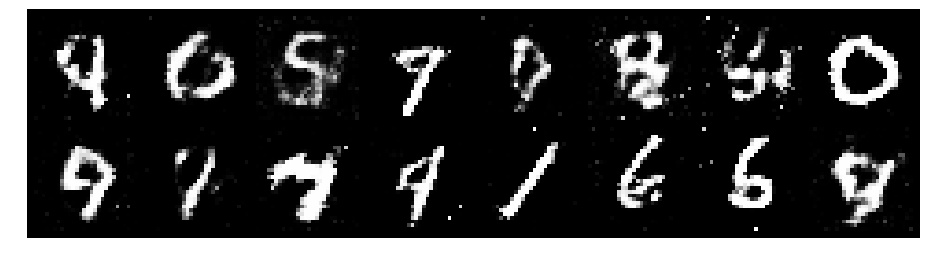

Epoch: [60/200], Batch Num: [0/600]
Discriminator Loss: 1.3605, Generator Loss: 1.1075
D(x): 0.4836, D(G(z)): 0.3598


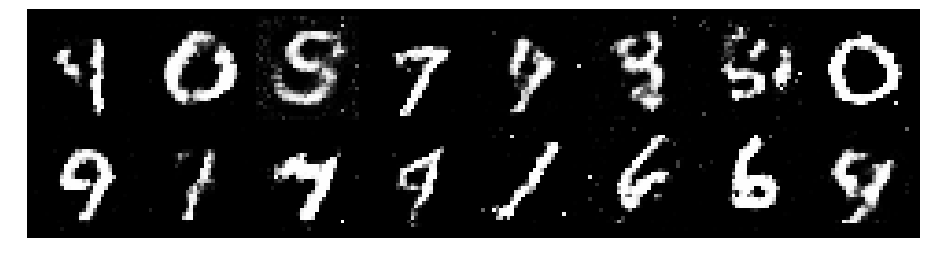

Epoch: [60/200], Batch Num: [300/600]
Discriminator Loss: 1.1874, Generator Loss: 1.0724
D(x): 0.5770, D(G(z)): 0.3920


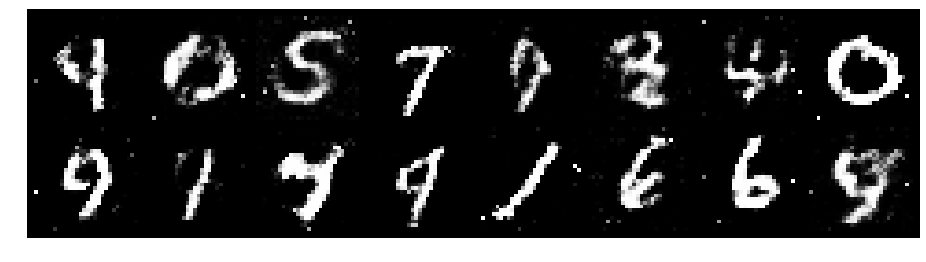

Epoch: [61/200], Batch Num: [0/600]
Discriminator Loss: 1.1053, Generator Loss: 0.9543
D(x): 0.6146, D(G(z)): 0.4236


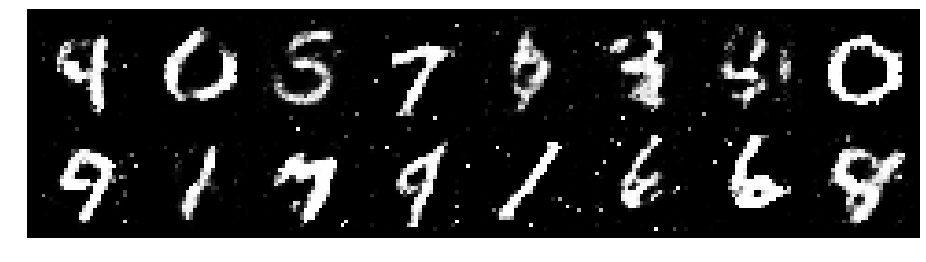

Epoch: [61/200], Batch Num: [300/600]
Discriminator Loss: 1.2283, Generator Loss: 0.9723
D(x): 0.5997, D(G(z)): 0.4295


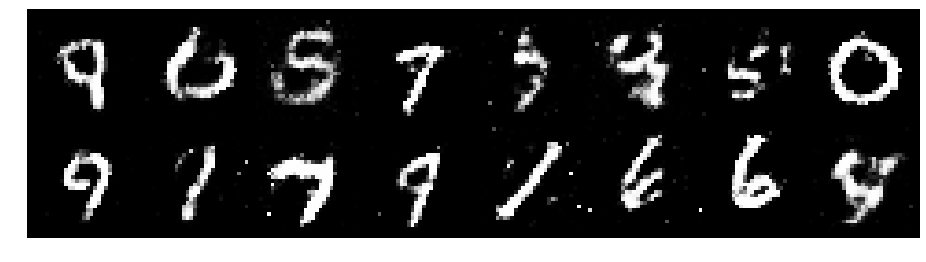

Epoch: [62/200], Batch Num: [0/600]
Discriminator Loss: 1.1092, Generator Loss: 1.2869
D(x): 0.6282, D(G(z)): 0.3795


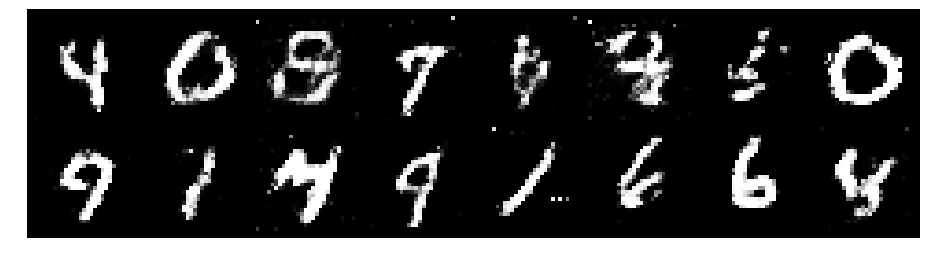

Epoch: [62/200], Batch Num: [300/600]
Discriminator Loss: 1.1567, Generator Loss: 0.9181
D(x): 0.6239, D(G(z)): 0.4377


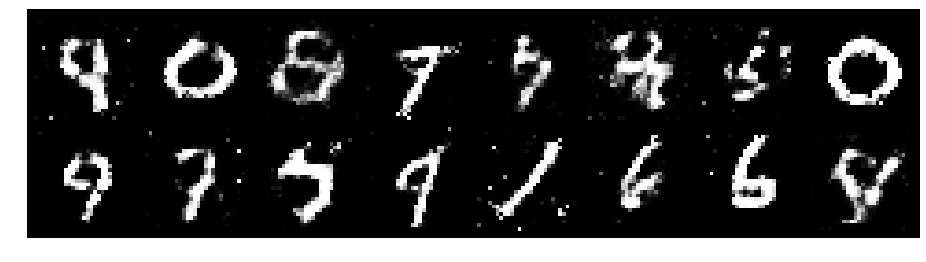

Epoch: [63/200], Batch Num: [0/600]
Discriminator Loss: 1.1787, Generator Loss: 0.9539
D(x): 0.5961, D(G(z)): 0.4247


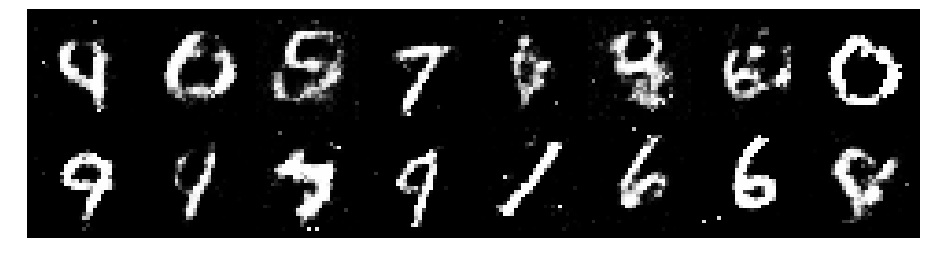

Epoch: [63/200], Batch Num: [300/600]
Discriminator Loss: 1.1806, Generator Loss: 0.8413
D(x): 0.5934, D(G(z)): 0.4464


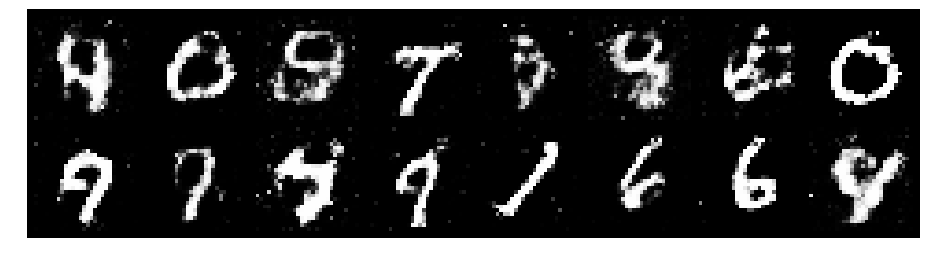

Epoch: [64/200], Batch Num: [0/600]
Discriminator Loss: 1.2355, Generator Loss: 1.0866
D(x): 0.5692, D(G(z)): 0.4031


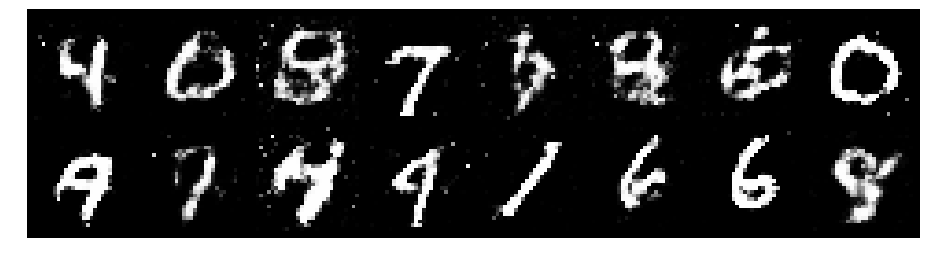

Epoch: [64/200], Batch Num: [300/600]
Discriminator Loss: 1.1835, Generator Loss: 0.9674
D(x): 0.6531, D(G(z)): 0.4623


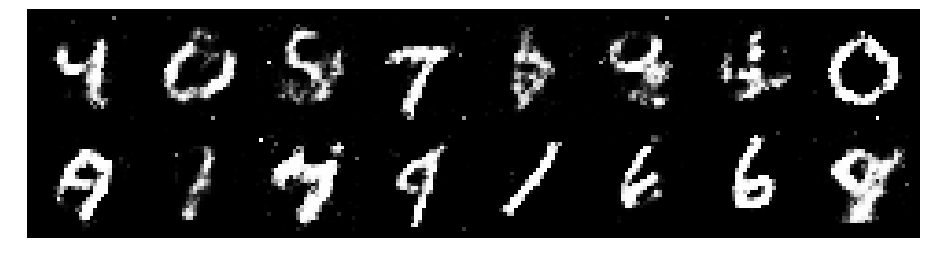

Epoch: [65/200], Batch Num: [0/600]
Discriminator Loss: 1.1737, Generator Loss: 1.0019
D(x): 0.6004, D(G(z)): 0.4261


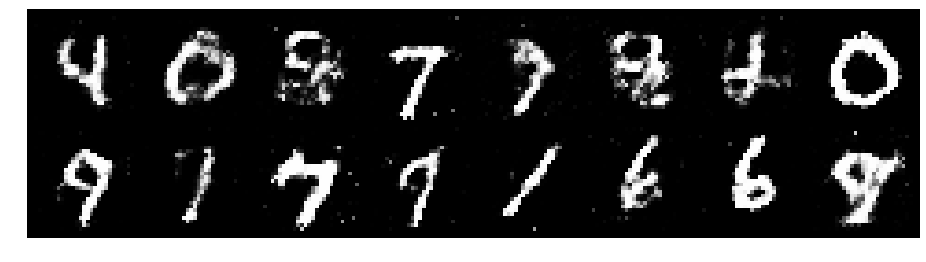

Epoch: [65/200], Batch Num: [300/600]
Discriminator Loss: 1.2074, Generator Loss: 1.0594
D(x): 0.6016, D(G(z)): 0.4343


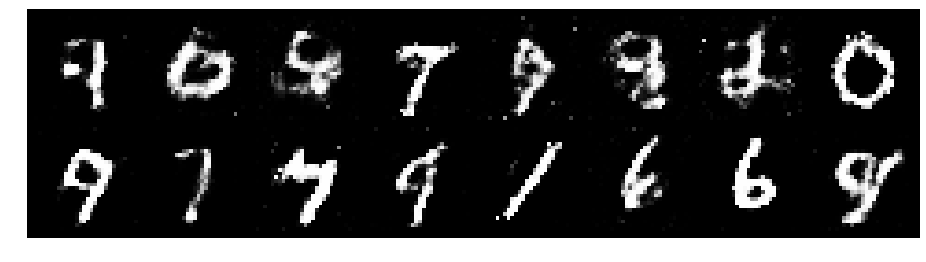

Epoch: [66/200], Batch Num: [0/600]
Discriminator Loss: 1.2570, Generator Loss: 0.9828
D(x): 0.5495, D(G(z)): 0.4382


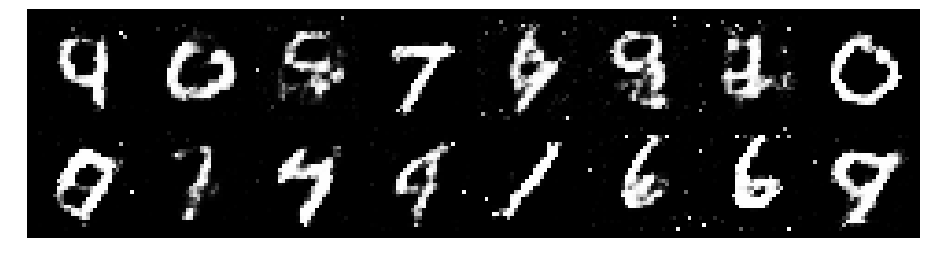

Epoch: [66/200], Batch Num: [300/600]
Discriminator Loss: 1.2450, Generator Loss: 1.3125
D(x): 0.5916, D(G(z)): 0.3953


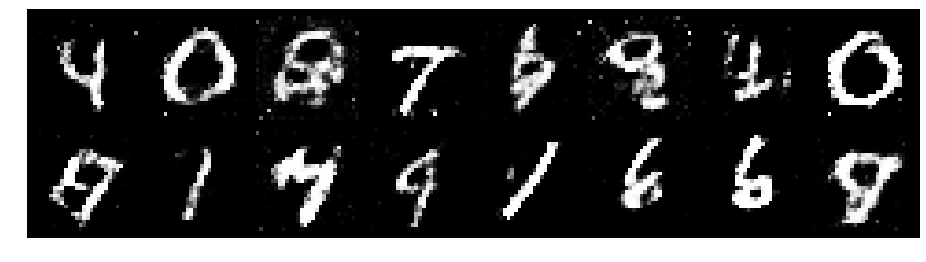

Epoch: [67/200], Batch Num: [0/600]
Discriminator Loss: 1.2192, Generator Loss: 1.1484
D(x): 0.6075, D(G(z)): 0.4197


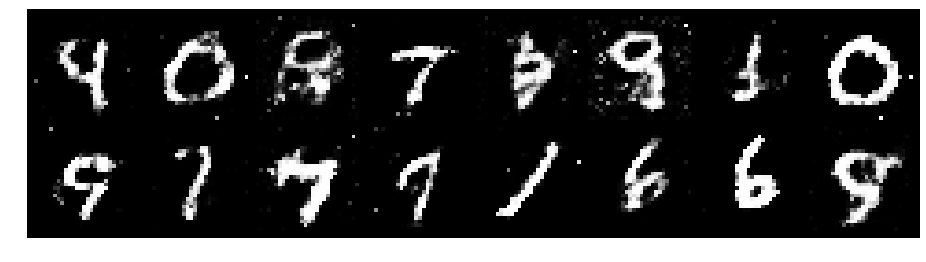

Epoch: [67/200], Batch Num: [300/600]
Discriminator Loss: 1.2596, Generator Loss: 1.3197
D(x): 0.6103, D(G(z)): 0.4113


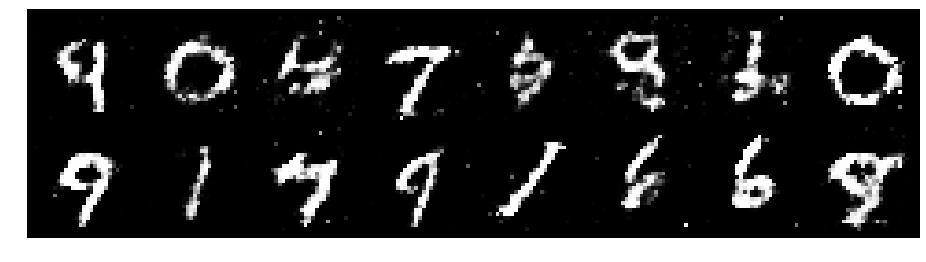

Epoch: [68/200], Batch Num: [0/600]
Discriminator Loss: 1.3243, Generator Loss: 1.1410
D(x): 0.5390, D(G(z)): 0.3931


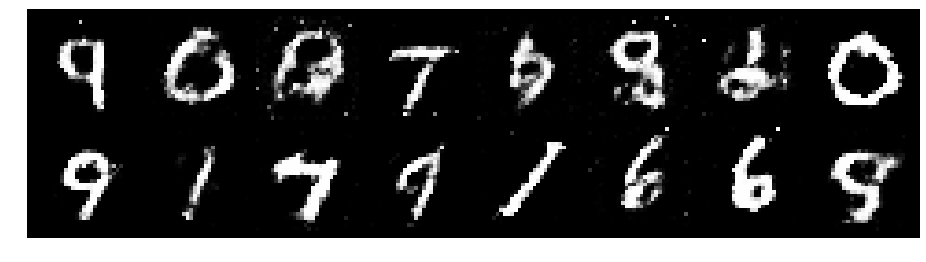

Epoch: [68/200], Batch Num: [300/600]
Discriminator Loss: 1.1334, Generator Loss: 1.2761
D(x): 0.6078, D(G(z)): 0.3631


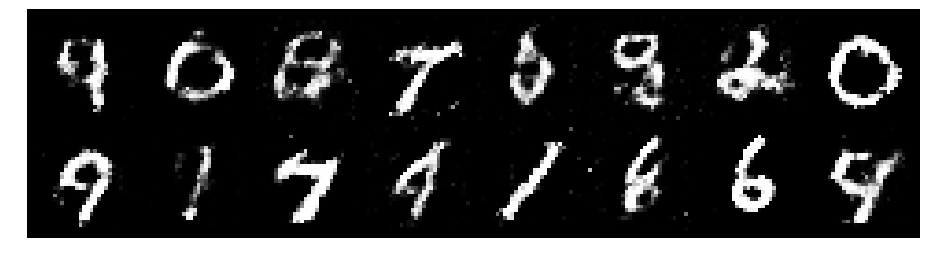

Epoch: [69/200], Batch Num: [0/600]
Discriminator Loss: 1.1807, Generator Loss: 0.9236
D(x): 0.6090, D(G(z)): 0.4234


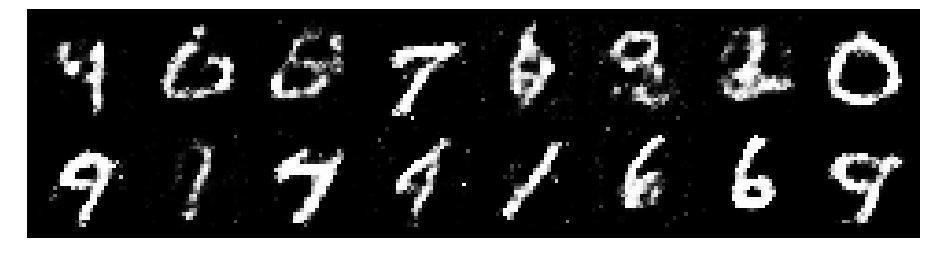

Epoch: [69/200], Batch Num: [300/600]
Discriminator Loss: 1.2403, Generator Loss: 0.9429
D(x): 0.5543, D(G(z)): 0.4320


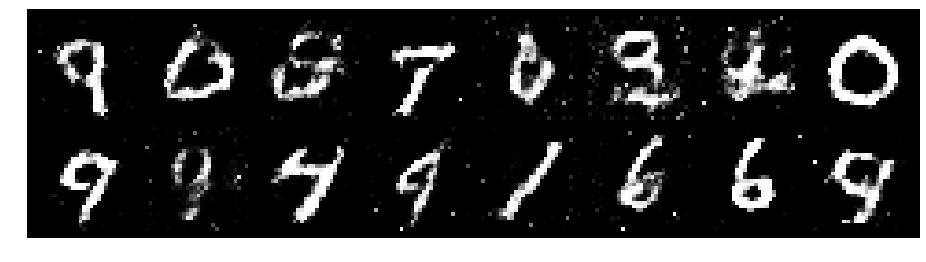

Epoch: [70/200], Batch Num: [0/600]
Discriminator Loss: 1.3449, Generator Loss: 1.0436
D(x): 0.5997, D(G(z)): 0.4670


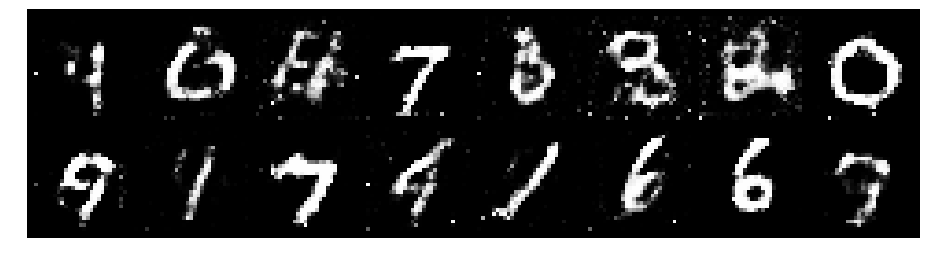

Epoch: [70/200], Batch Num: [300/600]
Discriminator Loss: 1.0823, Generator Loss: 1.0389
D(x): 0.5780, D(G(z)): 0.3781


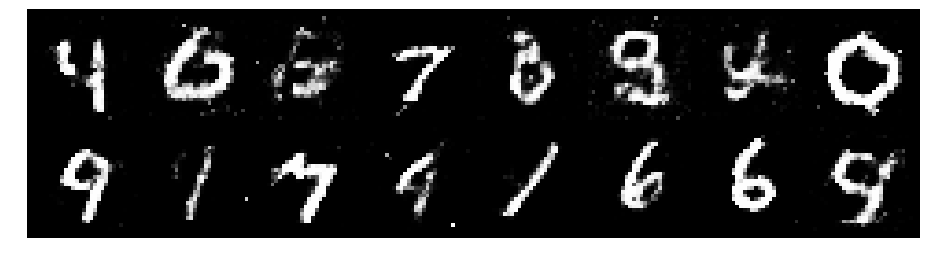

Epoch: [71/200], Batch Num: [0/600]
Discriminator Loss: 1.2039, Generator Loss: 0.9357
D(x): 0.5425, D(G(z)): 0.3736


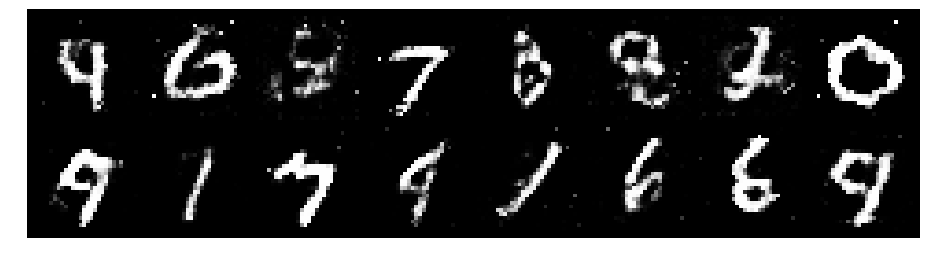

Epoch: [71/200], Batch Num: [300/600]
Discriminator Loss: 1.1656, Generator Loss: 1.0821
D(x): 0.6059, D(G(z)): 0.4159


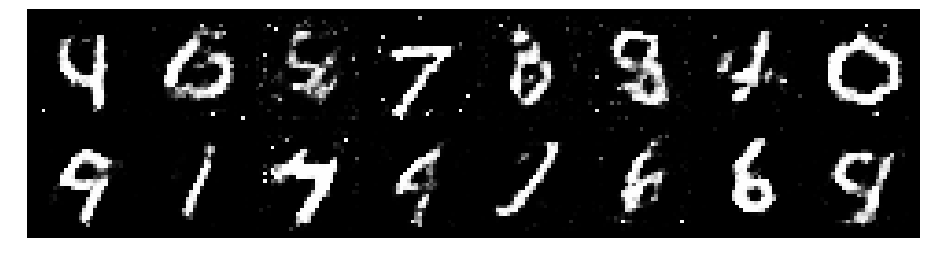

Epoch: [72/200], Batch Num: [0/600]
Discriminator Loss: 1.1399, Generator Loss: 0.9444
D(x): 0.5935, D(G(z)): 0.3868


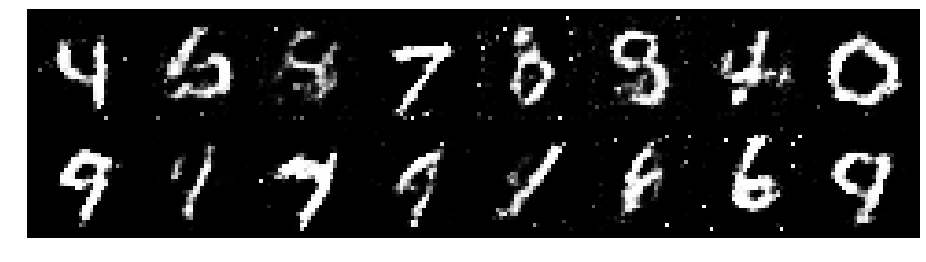

Epoch: [72/200], Batch Num: [300/600]
Discriminator Loss: 1.1093, Generator Loss: 1.0830
D(x): 0.5848, D(G(z)): 0.3744


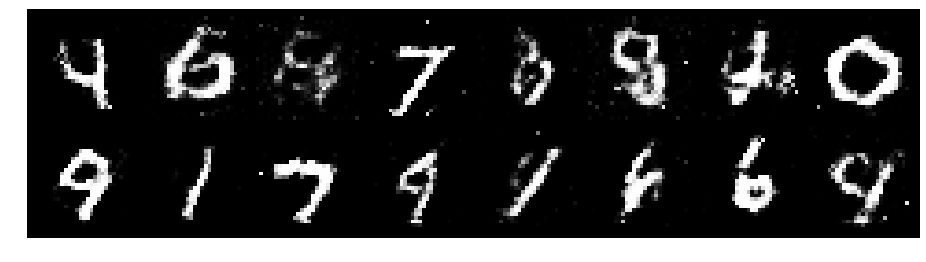

Epoch: [73/200], Batch Num: [0/600]
Discriminator Loss: 1.1150, Generator Loss: 0.9607
D(x): 0.6071, D(G(z)): 0.3957


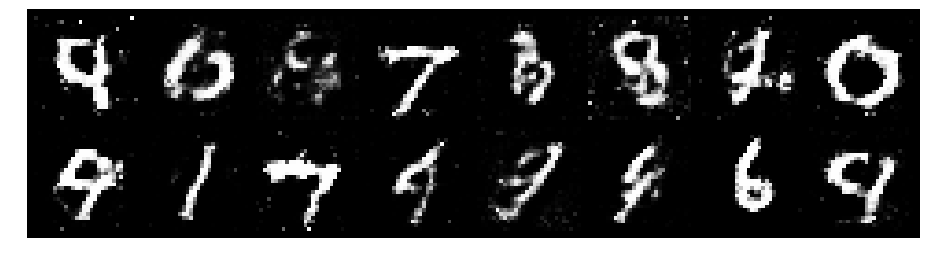

Epoch: [73/200], Batch Num: [300/600]
Discriminator Loss: 1.2564, Generator Loss: 0.8937
D(x): 0.5871, D(G(z)): 0.4591


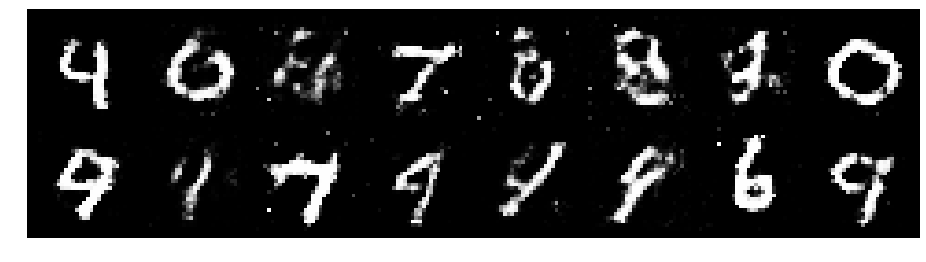

Epoch: [74/200], Batch Num: [0/600]
Discriminator Loss: 1.3004, Generator Loss: 0.8455
D(x): 0.5508, D(G(z)): 0.4312


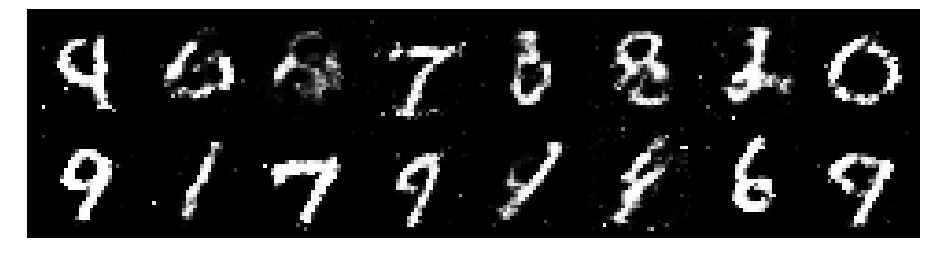

Epoch: [74/200], Batch Num: [300/600]
Discriminator Loss: 1.2168, Generator Loss: 0.9596
D(x): 0.5692, D(G(z)): 0.4115


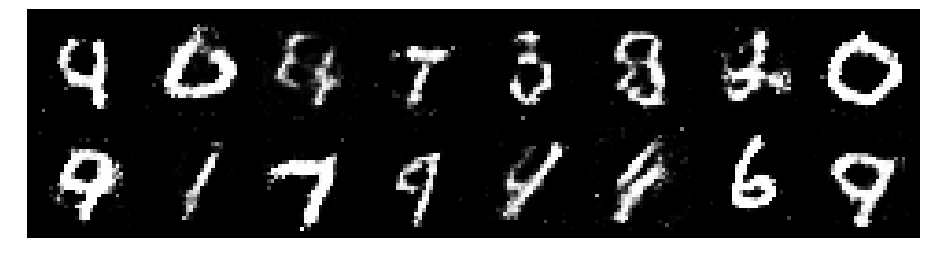

Epoch: [75/200], Batch Num: [0/600]
Discriminator Loss: 1.2133, Generator Loss: 0.9141
D(x): 0.5813, D(G(z)): 0.4235


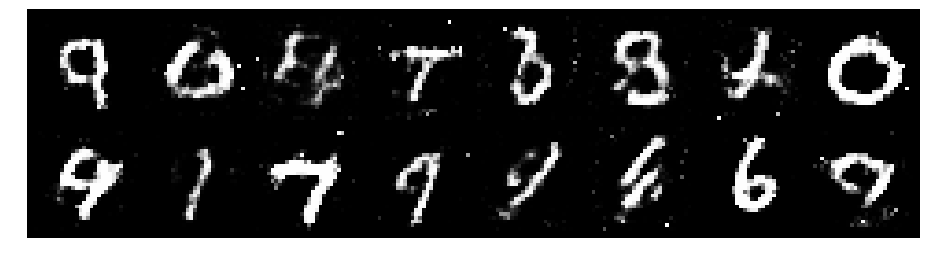

Epoch: [75/200], Batch Num: [300/600]
Discriminator Loss: 1.1826, Generator Loss: 1.0564
D(x): 0.5823, D(G(z)): 0.4045


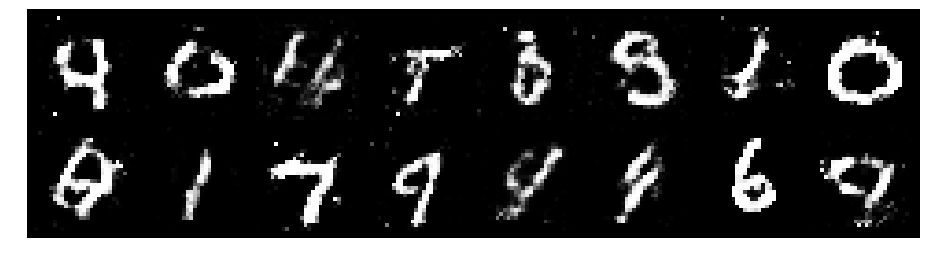

Epoch: [76/200], Batch Num: [0/600]
Discriminator Loss: 1.2180, Generator Loss: 1.0444
D(x): 0.5730, D(G(z)): 0.4223


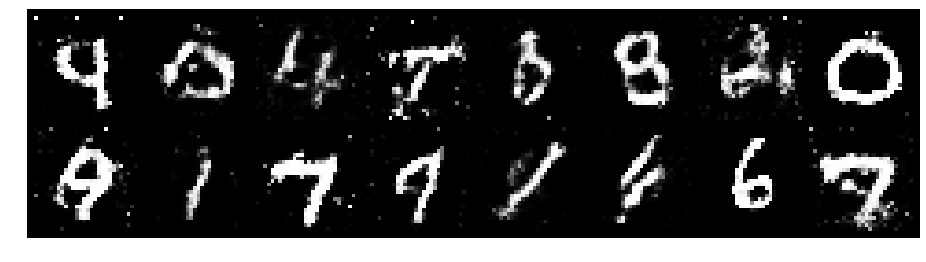

Epoch: [76/200], Batch Num: [300/600]
Discriminator Loss: 1.0741, Generator Loss: 1.0662
D(x): 0.5983, D(G(z)): 0.3667


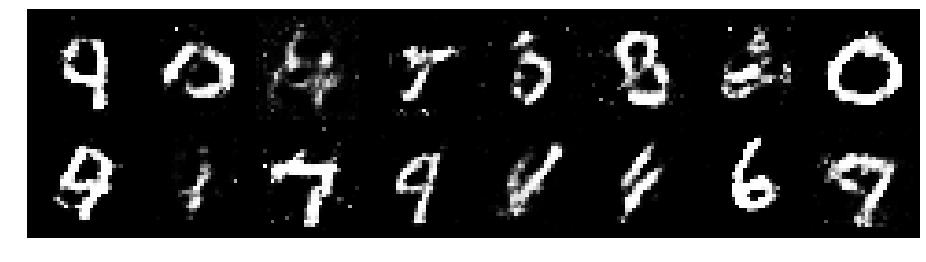

Epoch: [77/200], Batch Num: [0/600]
Discriminator Loss: 1.1888, Generator Loss: 0.8612
D(x): 0.5984, D(G(z)): 0.4321


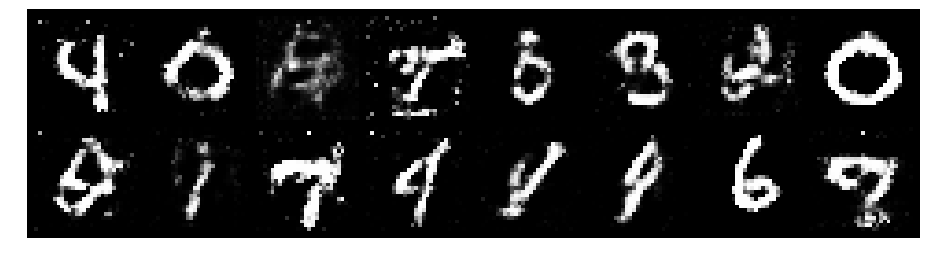

Epoch: [77/200], Batch Num: [300/600]
Discriminator Loss: 1.0473, Generator Loss: 1.0365
D(x): 0.6343, D(G(z)): 0.3926


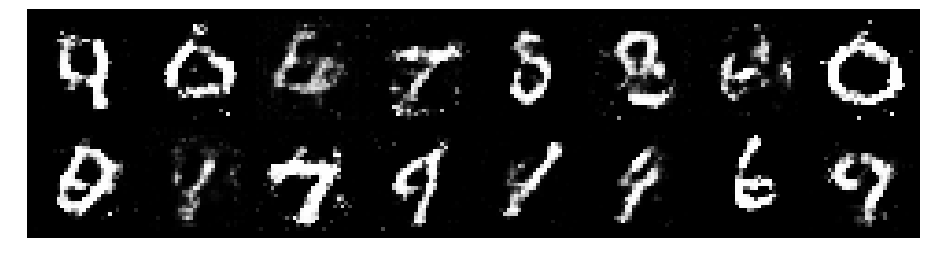

Epoch: [78/200], Batch Num: [0/600]
Discriminator Loss: 1.3252, Generator Loss: 1.0160
D(x): 0.5317, D(G(z)): 0.4169


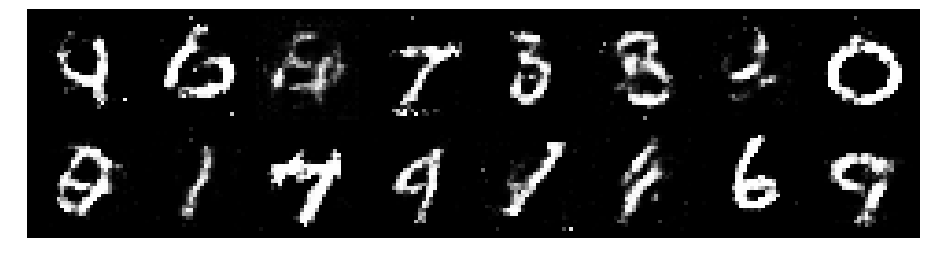

Epoch: [78/200], Batch Num: [300/600]
Discriminator Loss: 1.1930, Generator Loss: 1.0704
D(x): 0.5826, D(G(z)): 0.3908


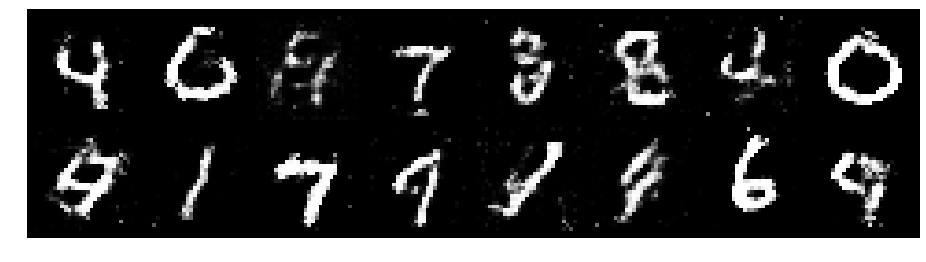

Epoch: [79/200], Batch Num: [0/600]
Discriminator Loss: 1.1131, Generator Loss: 0.8776
D(x): 0.6197, D(G(z)): 0.3887


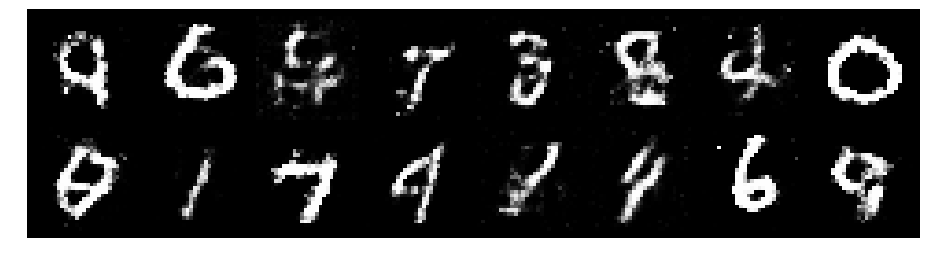

Epoch: [79/200], Batch Num: [300/600]
Discriminator Loss: 1.2527, Generator Loss: 0.9478
D(x): 0.5508, D(G(z)): 0.4267


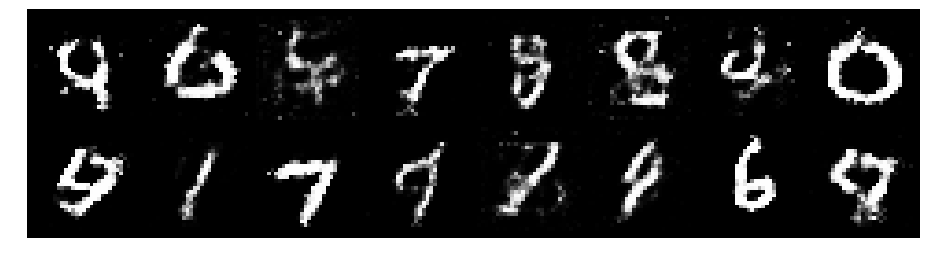

Epoch: [80/200], Batch Num: [0/600]
Discriminator Loss: 1.2686, Generator Loss: 0.8086
D(x): 0.5453, D(G(z)): 0.4486


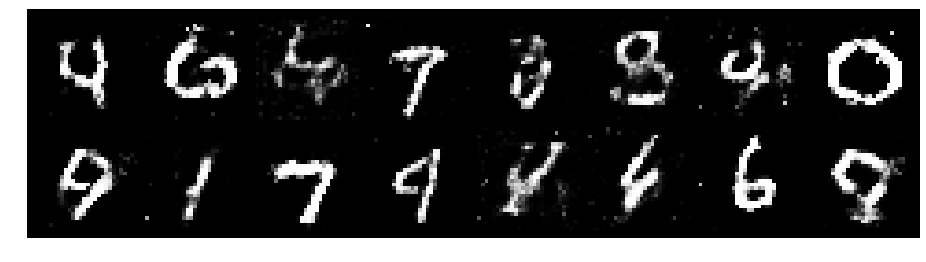

Epoch: [80/200], Batch Num: [300/600]
Discriminator Loss: 1.1413, Generator Loss: 1.1931
D(x): 0.6253, D(G(z)): 0.4051


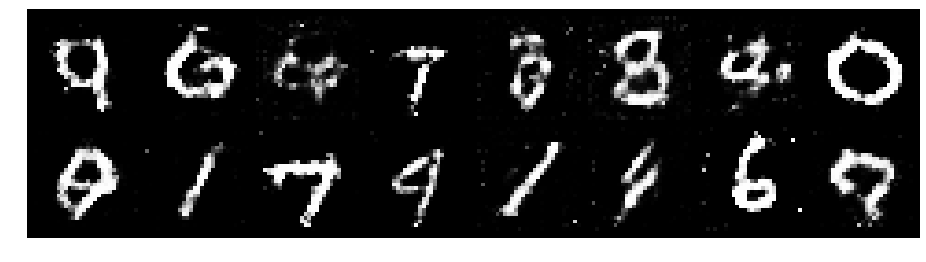

Epoch: [81/200], Batch Num: [0/600]
Discriminator Loss: 1.1806, Generator Loss: 0.9725
D(x): 0.5529, D(G(z)): 0.3820


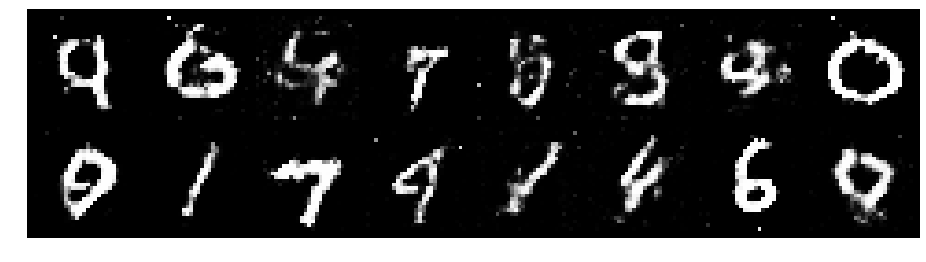

Epoch: [81/200], Batch Num: [300/600]
Discriminator Loss: 1.2966, Generator Loss: 1.1746
D(x): 0.5687, D(G(z)): 0.3866


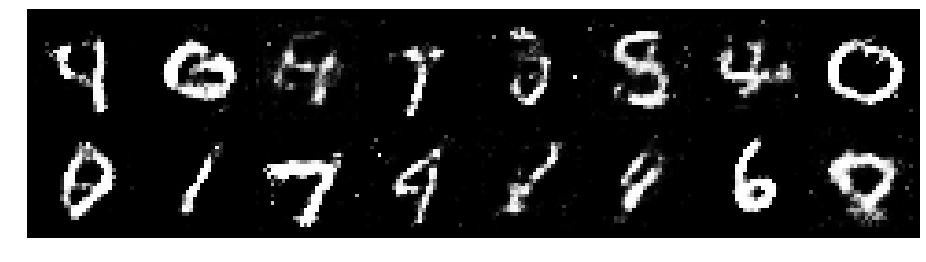

Epoch: [82/200], Batch Num: [0/600]
Discriminator Loss: 1.3621, Generator Loss: 0.9246
D(x): 0.5274, D(G(z)): 0.4472


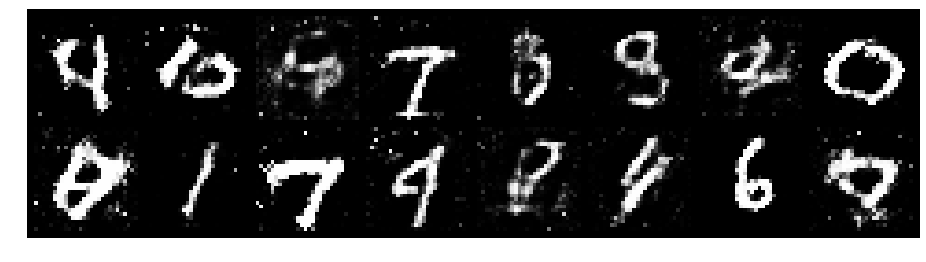

Epoch: [82/200], Batch Num: [300/600]
Discriminator Loss: 1.2019, Generator Loss: 0.8289
D(x): 0.6106, D(G(z)): 0.4482


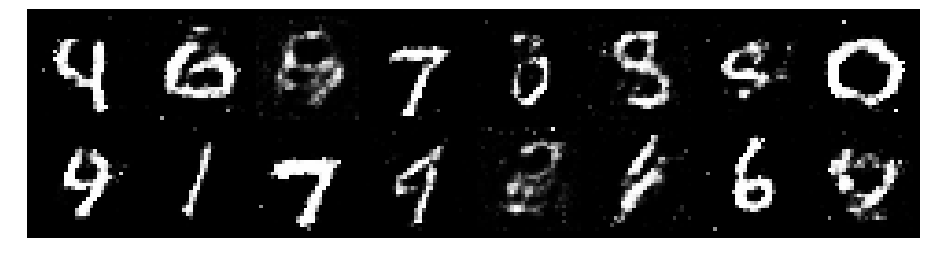

Epoch: [83/200], Batch Num: [0/600]
Discriminator Loss: 1.2369, Generator Loss: 0.9965
D(x): 0.5236, D(G(z)): 0.3768


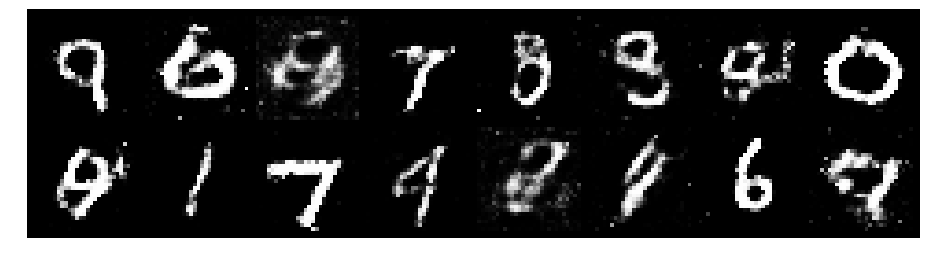

Epoch: [83/200], Batch Num: [300/600]
Discriminator Loss: 1.2927, Generator Loss: 0.9141
D(x): 0.5474, D(G(z)): 0.4148


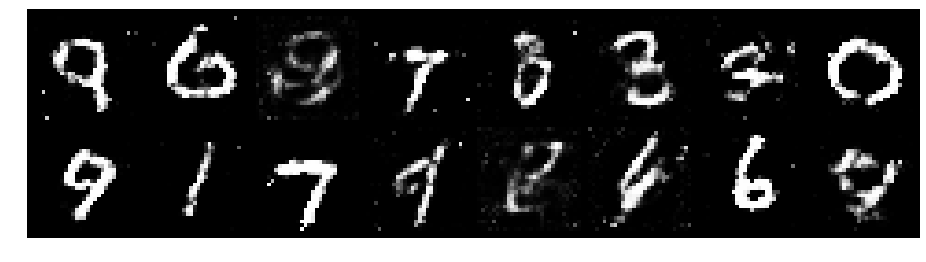

Epoch: [84/200], Batch Num: [0/600]
Discriminator Loss: 1.1271, Generator Loss: 1.0288
D(x): 0.6118, D(G(z)): 0.4055


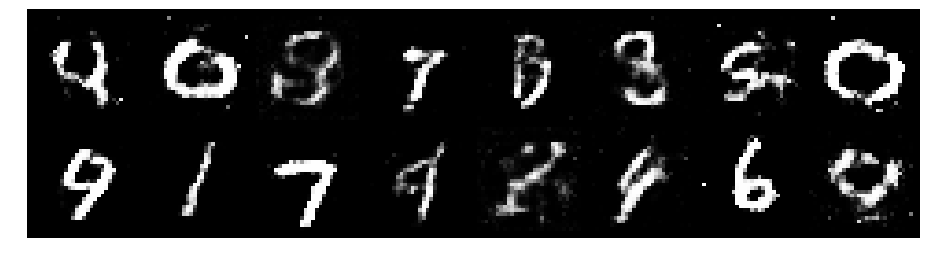

Epoch: [84/200], Batch Num: [300/600]
Discriminator Loss: 1.2900, Generator Loss: 0.9223
D(x): 0.5261, D(G(z)): 0.4017


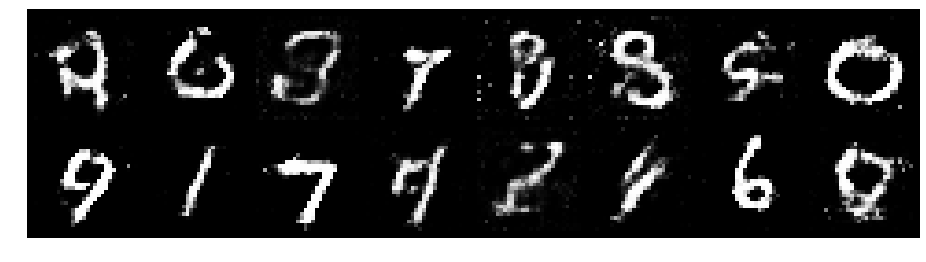

Epoch: [85/200], Batch Num: [0/600]
Discriminator Loss: 1.1337, Generator Loss: 1.2207
D(x): 0.6212, D(G(z)): 0.3981


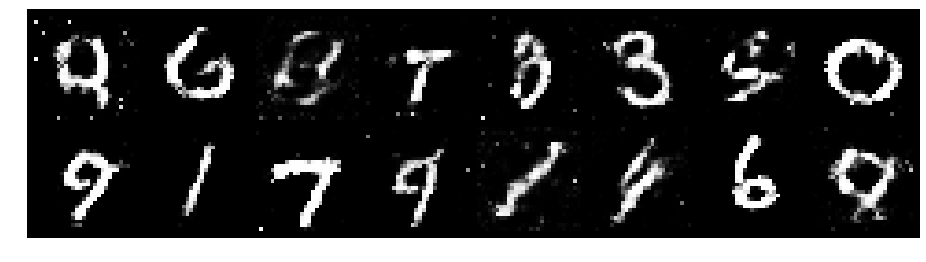

Epoch: [85/200], Batch Num: [300/600]
Discriminator Loss: 1.2264, Generator Loss: 0.8161
D(x): 0.6007, D(G(z)): 0.4542


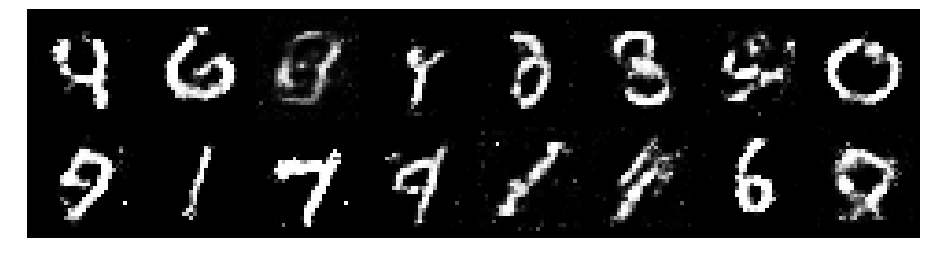

Epoch: [86/200], Batch Num: [0/600]
Discriminator Loss: 1.2634, Generator Loss: 0.8732
D(x): 0.5520, D(G(z)): 0.4454


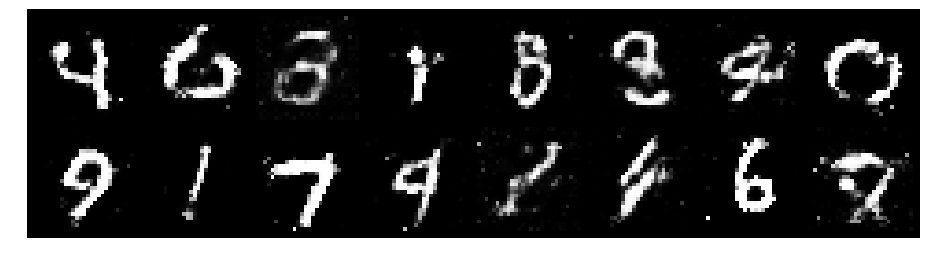

Epoch: [86/200], Batch Num: [300/600]
Discriminator Loss: 1.3206, Generator Loss: 0.9603
D(x): 0.5662, D(G(z)): 0.4556


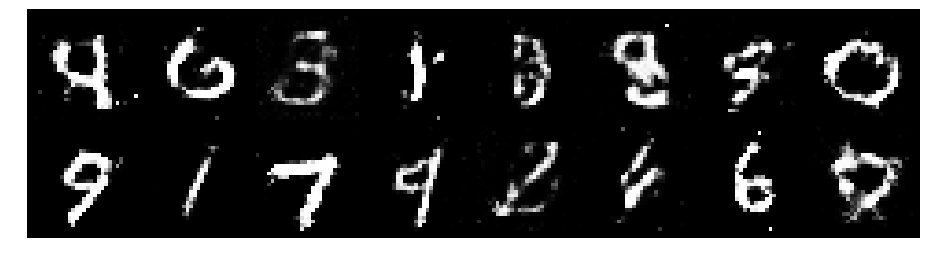

Epoch: [87/200], Batch Num: [0/600]
Discriminator Loss: 1.2238, Generator Loss: 0.8803
D(x): 0.5574, D(G(z)): 0.4279


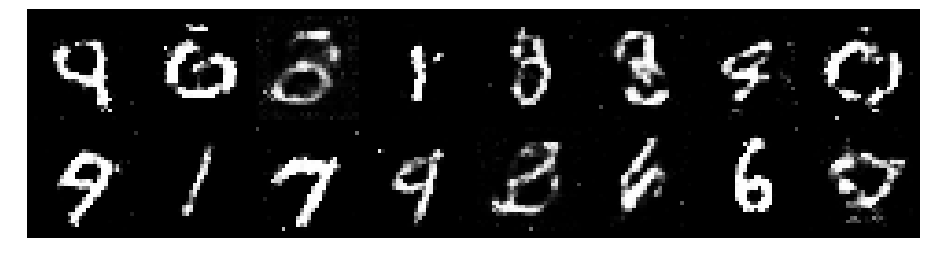

Epoch: [87/200], Batch Num: [300/600]
Discriminator Loss: 1.4654, Generator Loss: 0.8046
D(x): 0.5308, D(G(z)): 0.5085


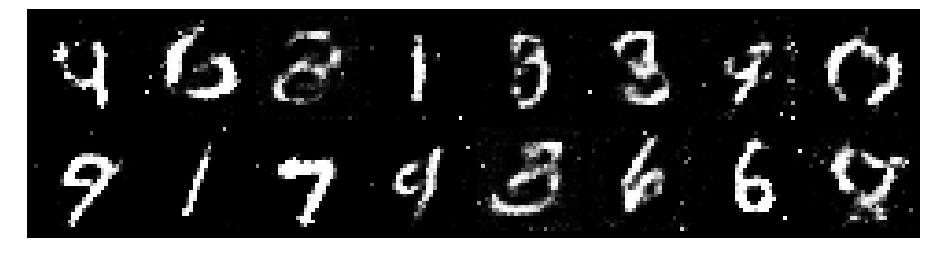

Epoch: [88/200], Batch Num: [0/600]
Discriminator Loss: 1.1718, Generator Loss: 0.9607
D(x): 0.5884, D(G(z)): 0.4195


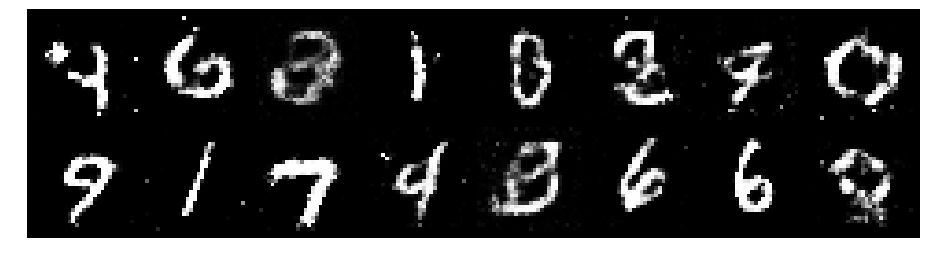

Epoch: [88/200], Batch Num: [300/600]
Discriminator Loss: 1.3354, Generator Loss: 0.8481
D(x): 0.5474, D(G(z)): 0.4771


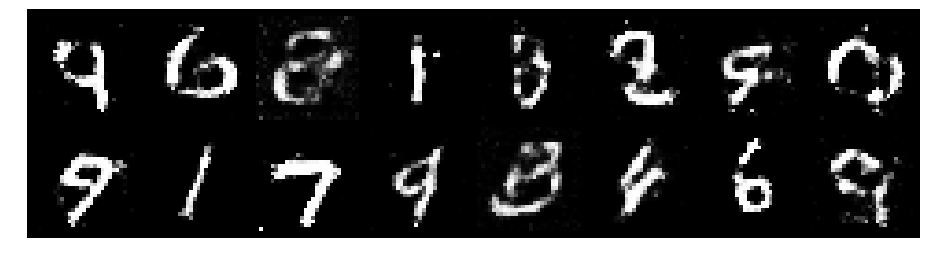

Epoch: [89/200], Batch Num: [0/600]
Discriminator Loss: 1.2038, Generator Loss: 0.9247
D(x): 0.5585, D(G(z)): 0.4151


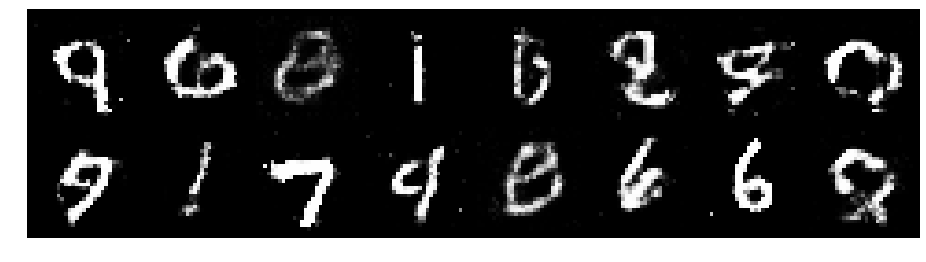

Epoch: [89/200], Batch Num: [300/600]
Discriminator Loss: 1.2542, Generator Loss: 0.9652
D(x): 0.5797, D(G(z)): 0.4523


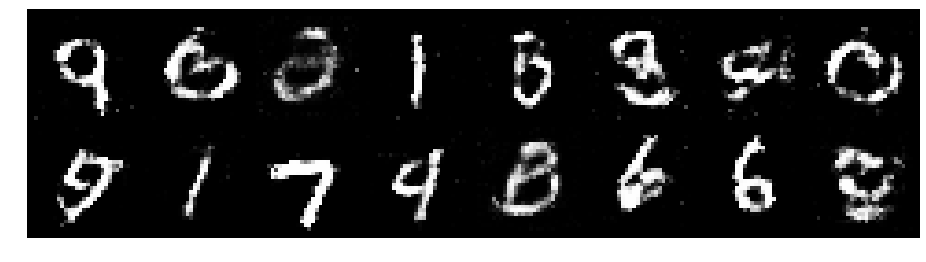

Epoch: [90/200], Batch Num: [0/600]
Discriminator Loss: 1.2824, Generator Loss: 1.0390
D(x): 0.5586, D(G(z)): 0.4266


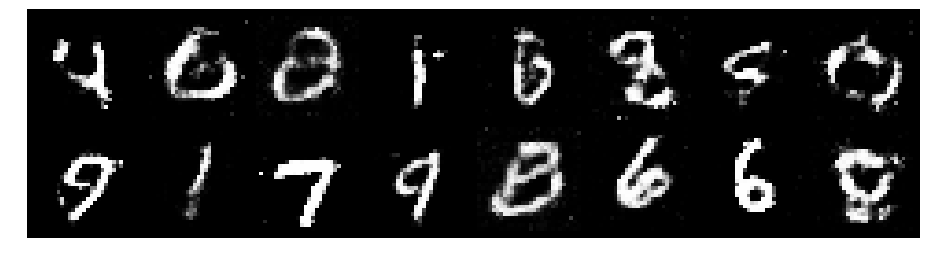

Epoch: [90/200], Batch Num: [300/600]
Discriminator Loss: 1.0766, Generator Loss: 1.0602
D(x): 0.6124, D(G(z)): 0.3796


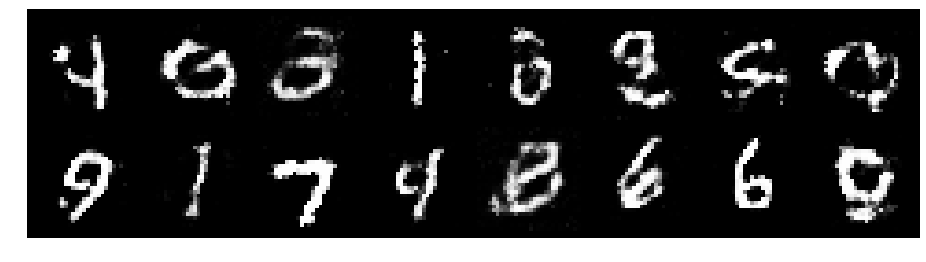

Epoch: [91/200], Batch Num: [0/600]
Discriminator Loss: 1.1547, Generator Loss: 1.0286
D(x): 0.5837, D(G(z)): 0.3938


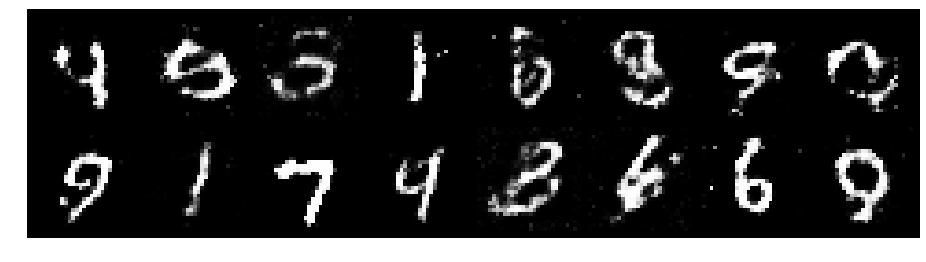

Epoch: [91/200], Batch Num: [300/600]
Discriminator Loss: 1.2509, Generator Loss: 0.8024
D(x): 0.5698, D(G(z)): 0.4545


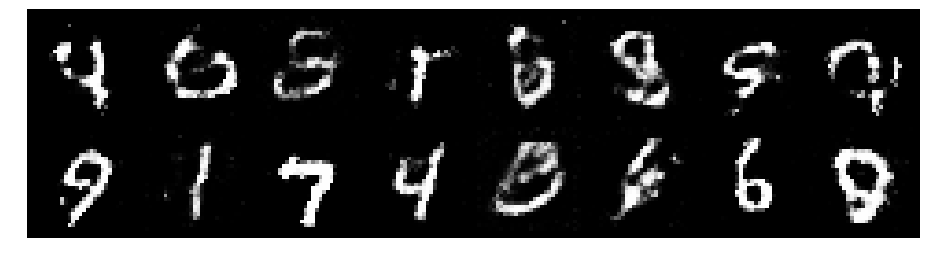

Epoch: [92/200], Batch Num: [0/600]
Discriminator Loss: 1.2745, Generator Loss: 1.1284
D(x): 0.5600, D(G(z)): 0.4134


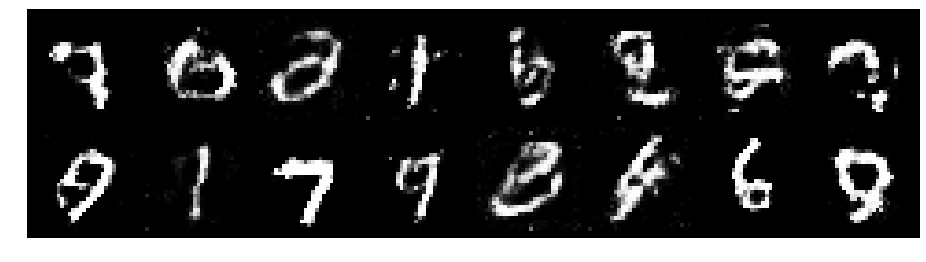

Epoch: [92/200], Batch Num: [300/600]
Discriminator Loss: 1.1568, Generator Loss: 1.0067
D(x): 0.5869, D(G(z)): 0.3952


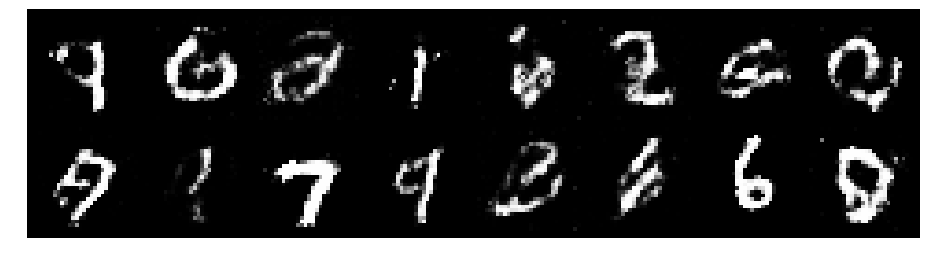

Epoch: [93/200], Batch Num: [0/600]
Discriminator Loss: 1.2564, Generator Loss: 0.8748
D(x): 0.5862, D(G(z)): 0.4617


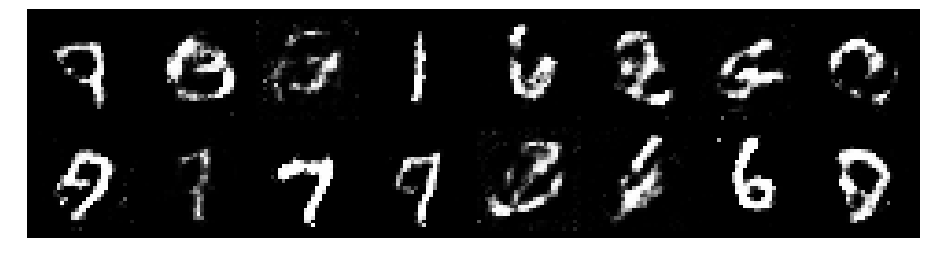

Epoch: [93/200], Batch Num: [300/600]
Discriminator Loss: 1.2726, Generator Loss: 0.9525
D(x): 0.5837, D(G(z)): 0.4531


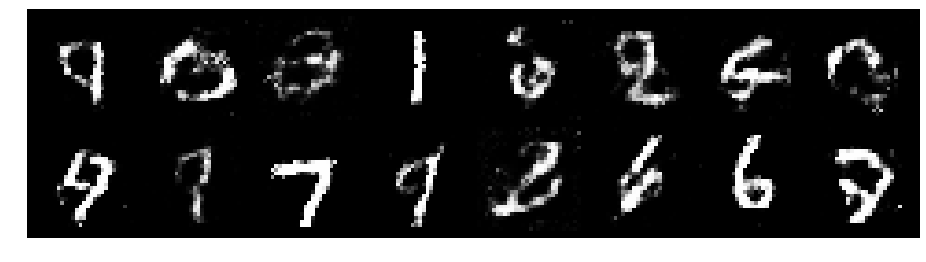

Epoch: [94/200], Batch Num: [0/600]
Discriminator Loss: 1.1945, Generator Loss: 1.1073
D(x): 0.5471, D(G(z)): 0.3936


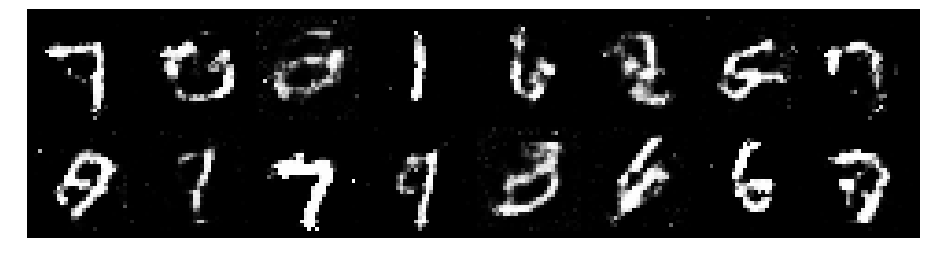

Epoch: [94/200], Batch Num: [300/600]
Discriminator Loss: 1.2025, Generator Loss: 0.8783
D(x): 0.5906, D(G(z)): 0.4321


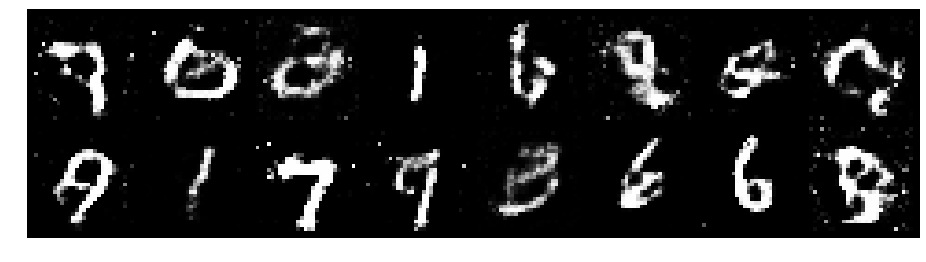

Epoch: [95/200], Batch Num: [0/600]
Discriminator Loss: 1.2493, Generator Loss: 0.9591
D(x): 0.5682, D(G(z)): 0.4458


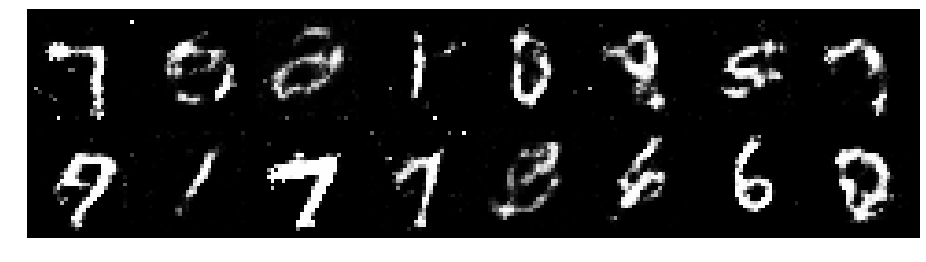

Epoch: [95/200], Batch Num: [300/600]
Discriminator Loss: 1.3189, Generator Loss: 0.7700
D(x): 0.5447, D(G(z)): 0.4622


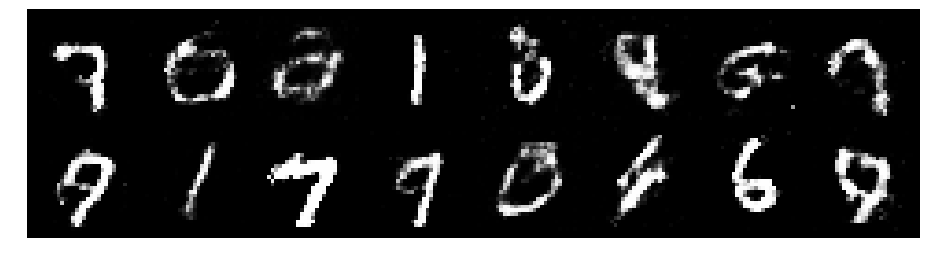

Epoch: [96/200], Batch Num: [0/600]
Discriminator Loss: 1.2657, Generator Loss: 0.9116
D(x): 0.5523, D(G(z)): 0.4304


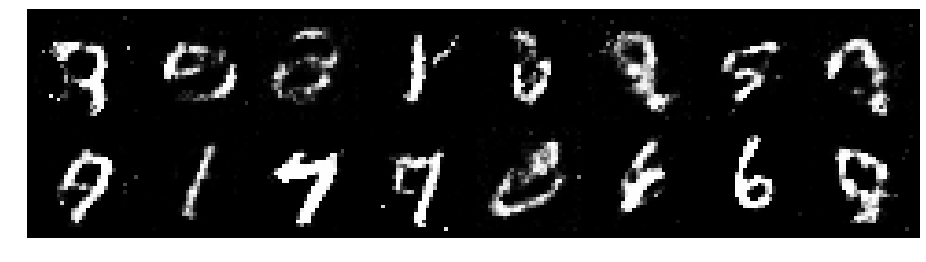

Epoch: [96/200], Batch Num: [300/600]
Discriminator Loss: 1.3826, Generator Loss: 0.9237
D(x): 0.5611, D(G(z)): 0.4543


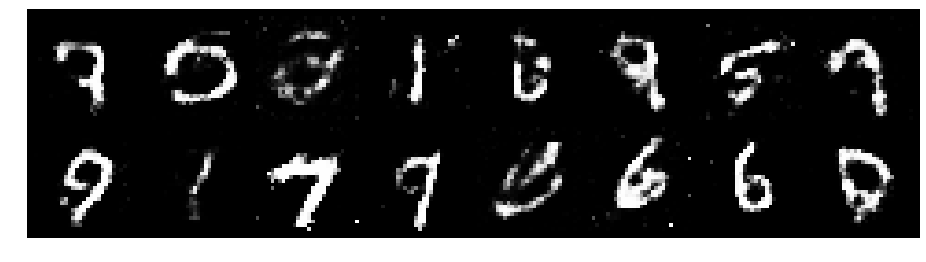

Epoch: [97/200], Batch Num: [0/600]
Discriminator Loss: 1.2345, Generator Loss: 1.0271
D(x): 0.6116, D(G(z)): 0.4604


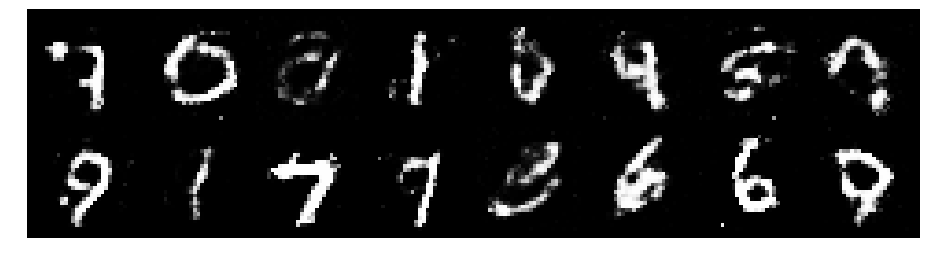

Epoch: [97/200], Batch Num: [300/600]
Discriminator Loss: 1.1814, Generator Loss: 0.8744
D(x): 0.5979, D(G(z)): 0.4134


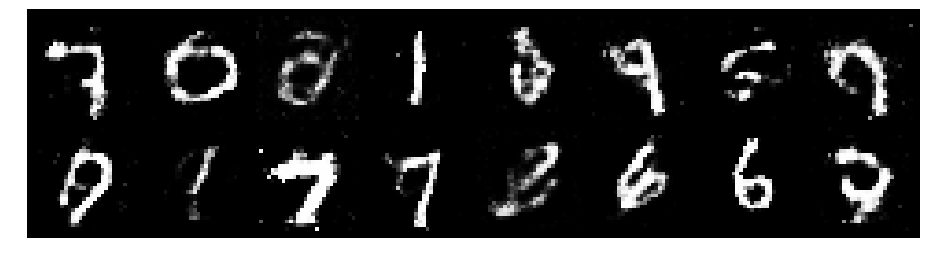

Epoch: [98/200], Batch Num: [0/600]
Discriminator Loss: 1.2616, Generator Loss: 0.8012
D(x): 0.5573, D(G(z)): 0.4576


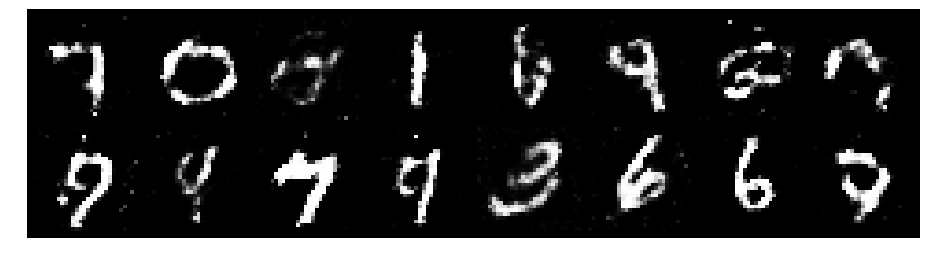

Epoch: [98/200], Batch Num: [300/600]
Discriminator Loss: 1.2263, Generator Loss: 0.9314
D(x): 0.6159, D(G(z)): 0.4412


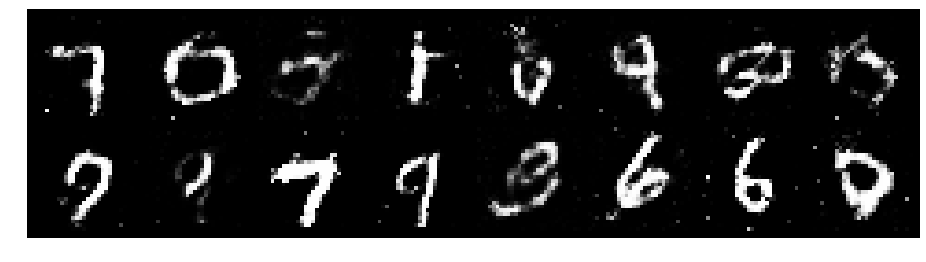

Epoch: [99/200], Batch Num: [0/600]
Discriminator Loss: 1.3441, Generator Loss: 1.0002
D(x): 0.5957, D(G(z)): 0.4854


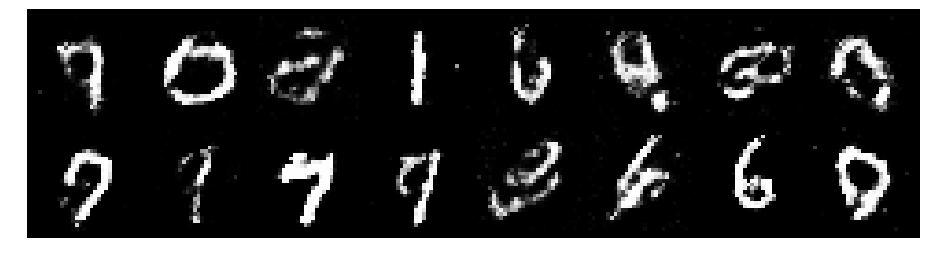

Epoch: [99/200], Batch Num: [300/600]
Discriminator Loss: 1.2484, Generator Loss: 0.9047
D(x): 0.5616, D(G(z)): 0.4350


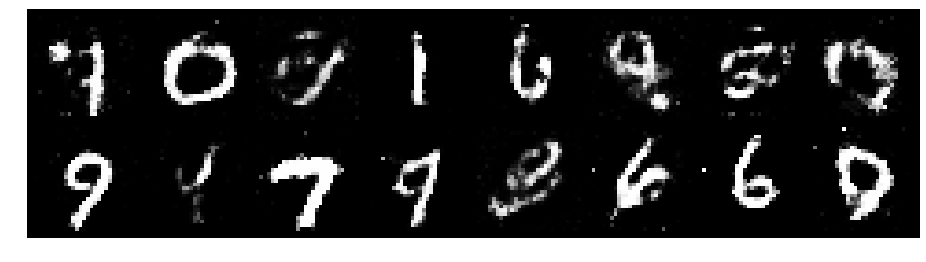

Epoch: [100/200], Batch Num: [0/600]
Discriminator Loss: 1.1958, Generator Loss: 0.9955
D(x): 0.5769, D(G(z)): 0.4177


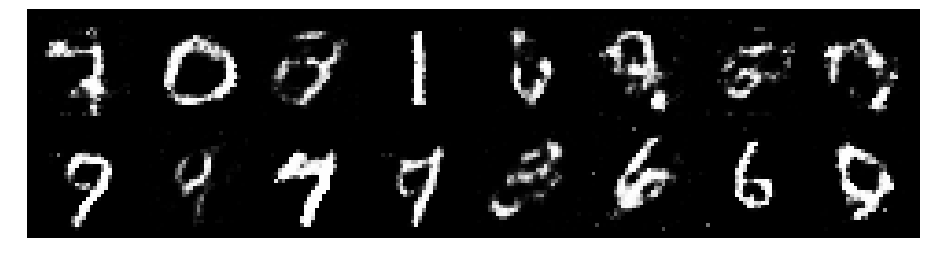

Epoch: [100/200], Batch Num: [300/600]
Discriminator Loss: 1.2935, Generator Loss: 0.9480
D(x): 0.5413, D(G(z)): 0.4413


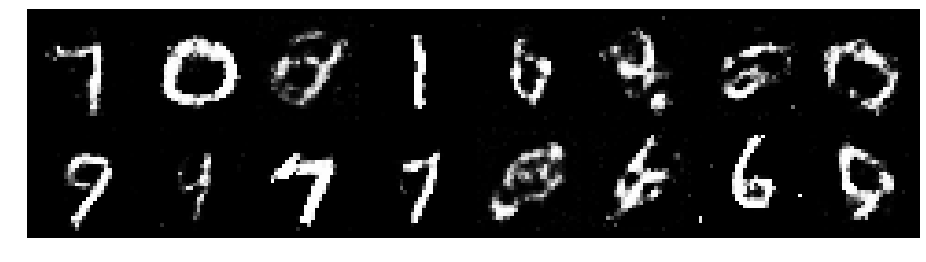

Epoch: [101/200], Batch Num: [0/600]
Discriminator Loss: 1.3106, Generator Loss: 0.9170
D(x): 0.5260, D(G(z)): 0.4443


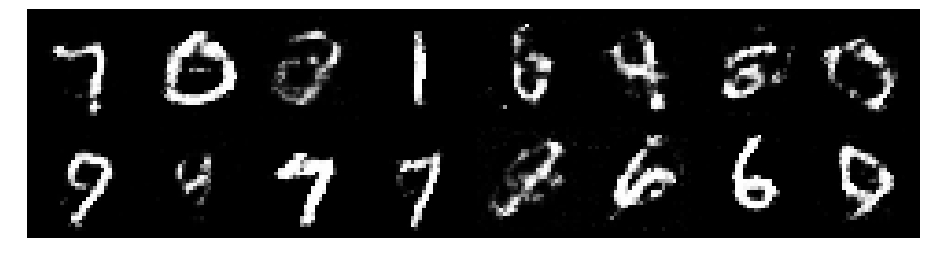

Epoch: [101/200], Batch Num: [300/600]
Discriminator Loss: 1.1566, Generator Loss: 0.9039
D(x): 0.6144, D(G(z)): 0.4315


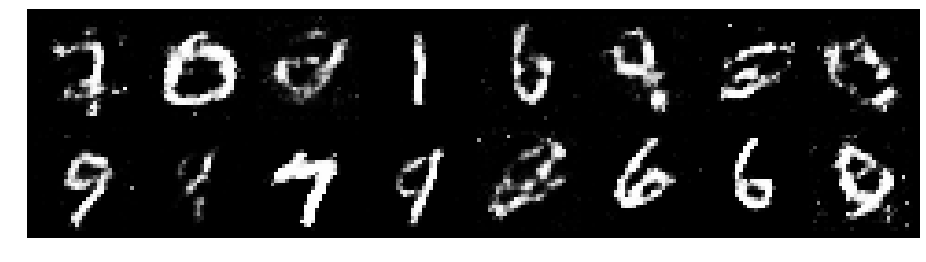

Epoch: [102/200], Batch Num: [0/600]
Discriminator Loss: 1.2367, Generator Loss: 0.8900
D(x): 0.6043, D(G(z)): 0.4318


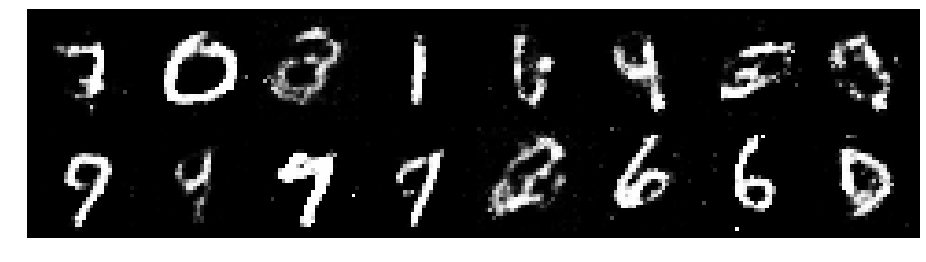

Epoch: [102/200], Batch Num: [300/600]
Discriminator Loss: 1.0772, Generator Loss: 0.9585
D(x): 0.6510, D(G(z)): 0.3999


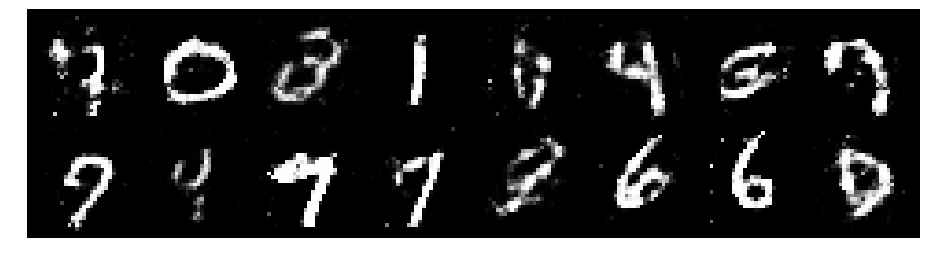

Epoch: [103/200], Batch Num: [0/600]
Discriminator Loss: 1.1398, Generator Loss: 1.0351
D(x): 0.6058, D(G(z)): 0.4180


In [ ]:
#training
logger = Logger(model_name='VGAN', data_name='MNIST')

num_epochs=200
for epoch in range(num_epochs):
    for n_batch,(real_batch,_) in enumerate(dataloader):
        N=real_batch.size(0)
        real_data=image_to_vec(real_batch)
        fake_data=gen(noise(N)).detach()
        d_error,d_pred_real,d_pred_fake=train_disc(disc_optimizer,real_data,fake_data)
        
        fake_data=gen(noise(N))
        g_error=train_gen(gen_optimizer,fake_data)
        
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        
        if(n_batch)%300==0: 
            test_images=vec_to_image(gen(test_noise))
            test_images=test_images.data
        
            logger.log_images(test_images, num_test_samples, epoch, n_batch, num_batches);
            logger.display_status(epoch, num_epochs, n_batch, num_batches,d_error, g_error, d_pred_real, d_pred_fake)
            